# EXPLORATORY DATA ANALYSIS EDA - MEMORIA 


## Datos

La enteridad de estos datos fueron extraidos directamente de tres paginas web que se mencionan posteriormente. Los mismos se bajaron directamente con CSV y se importaron al Notebook.

Fuentes:

fuente_1 = "https://www.cobusecuador.ec"

Descripción: Este es el sitio web oficial de Cobus Ecuador, empresa de Big Data en Logistica para Latinoamerica. Se utilizó su interfaz para descargar directamente los csv con las importaciones de fertilziantes del mundo a Ecuador. Se escogió el periodo de tiempo entre 2009-2024

fuente_2 = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/"

Descripción: Este enlace pertenece al Centro Nacional de Información Ambiental (NCEI) de la NOAA (Administración Nacional Oceánica y Atmosférica de EE.UU.), una base de datos meteorológica que ofrece registros diarios de variables como temperatura, precipitación, viento, etc., de estaciones climáticas de todo el mundo. De aquí se extrajeron los parametros climáticos de la posición específico dell aeropuerto de Guayaquil.

fuente_3 = "https://www.investing.com/commodities/urea-granular-fob-middle-east-futures"

Descripción: Portal financiero global que proporciona información sobre mercados, precios de commodities (materias primas), divisas y más. Te aquí se sacaron los precios historicos de la Urea y el Gas Natural. La Urea solo tenía datos desde 2017, Gas Natural desde 2009.

In [171]:
import numpy as np
import pandas as pd

<h1>Data importaciones UREA a Ecuador 2009-2024</h1>

En la casilla siguiente me bajare la data de las importaciones de Urea a Ecuador del 2009 al 2024. Se separó y leyó la data en 8 diferentes paquetes, todos comprenden las importaciones de Urea al Ecuador entre 2009-2024. Se escogió nada más la Urea, por simplicidad en el análisis y porque es el fertilizante más utilizado en Ecuador, como veremos después representa casi el 50 porciento del mercado.

In [172]:
data1 = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Importaciones UREA/01:01:2009 - 31:12:2011.csv") 
data2 = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Importaciones UREA/01:12:2012-31:12:2014.csv") 
data3 = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Importaciones UREA/01:01:2015-31:12:2015.csv") 
data4 = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Importaciones UREA/01:01:2016-31:12:2018.csv") 
data5 = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Importaciones UREA/01:01:2019-31:12:2019.csv") 
data6 = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Importaciones UREA/01:01:2020-31:12:2022.csv") 
data7 = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Importaciones UREA/01:01:2023-31:12:2023.csv") 
data8 = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Importaciones UREA/01:01:2024-12:31:2024.csv") 

Una vez tenemos todos los datos en paquetes, los conectaremos en un solo paquete de raw data. Lo hacemos con concat.

In [173]:
data_total_raw_importaciones_urea = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], axis=0,ignore_index=True) 


Guardamos este archivo para uso futuro

In [174]:
data_total_raw_importaciones_urea.to_csv('Data_2/data_total_raw_importaciones_urea.csv') 

Utilizamos esta función para poder todas las columnas y así escoger las que nos serán útiles, simplificando el trabajo.

In [175]:
pd.options.display.max_columns = None
data_total_raw_importaciones_urea

,RAZON SOCIAL,POTENCIAL UNO,NOMBRE COMERCIAL,RUC,CONSIGNATARIO,POSICION ARANCELARIA,CODIGO COMPLEMENTARIO,CODIGO SUPLEMENTARIO,DESCRIPCION POSICION,DESCRIPCION DEL DESPACHO,MARCA,MODELO,REFRENDO,ITEM,DAU,FECHA DESPACHO,FECHA EMBARQUE,FECHA LLEGADA,FECHA LIQUIDACION,FECHA PAGO,FECHA SALIDA ALMACEN,REGIMEN,NUMERO MANIFIESTO,MANIFIESTO,CODIGO DOCUMENTO TRANSPORTE,DOCUMENTO TRANSPORTE,ADUANA,PAIS ORIGEN,PAIS PROCEDENCIA,PAIS EMBARQUE,PUERTO EMBARQUE,VIA TRANSPORTE,CONTENEDORES,DEPOSITO,FOB U$S,FLETE U$S,SEGURO U$S,CIF U$S,FACTURA,VALOR FACTURA U$S,BASE IMPONIBLE U$S,KGS NETO,KGS BRUTO,UNIDADES,TIPO UNIDAD,PRECIO UNITARIO U$S,CANTIDAD COMERCIAL,UNIDAD COMERCIAL,PRECIO UNITARIO COMERCIAL U$S,TIPO UNIDAD NOMENCLADOR,ADVAL,MONEDA,EMBARCADOR,INCOTERM,CODIGO LIBERACION,ESTADO MERCADERIA,CLASE MERCADERIA,PAIS DESTINO,TOTAL FOB U$S,TOTAL FLETE U$S,TOTAL SEGURO U$S,TOTAL CIF U$S,TOTAL KGS NETO,TOTAL KGS BRUTO,TOTAL BASE IMPONIBLE,TOTAL CANTIDAD BULTOS,TOTAL AJUSTES,TOTAL OTROS AJUSTES,CLASE,VERIFICADOR,AGENTE AFIANZADO,NAVE,AGENCIA TRANSPORTE,EMPRESA TRANSPORTE,AFORADOR,FECHA AFORO,TIPO AFORO,ACTIVIDAD PRINCIPAL DEL IMPORTADOR,DIRECCION DEL IMPORTADOR,DIRECCION DEL CONSIGNATARIO,CONSOLIDADORA
0,DELCORP S.A.,SERVICIOS AGRICOLAS SOCIEDAD ANONIMA COMERCIAL...,DELCORP S.A.,991265414001,NaN,3102.10.10.00,0,0,Con un porcentaje de nitrógeno superior o igua...,"UREA-COLOR BLANCO, NITROGENO 46.0% MIN GRANULO...",NaN,NaN,28200910000815,1,14279592.0,2009-01-06,2008-10-27,2008-12-13,0000-00-00,0000-00-00,0000-00-00,IMPORTACION A CONSUMO,NaN,1851,NaN,MSCUVN989404,GUAYAQUIL MARITIMO,CHINA,VIET NAM,VIET NAM,VNSGN-HO CHI MINH CITY,MARITIMO,0.0,NaN,"359,550.25","76,110.00","1,157.71","436,817.97",NaN,0.0,0.0,"575,000.00","576,725.00","575,000.00",NaN,0.63,0.0,NaN,0.0,"kg, Kilogramo",0.0,DOL,KEYTRADE,NaN,"IVA 0 semillas ,bulbos,plantas,esquejes,raices...",NUEVO,NaN,NO ESPECIFICADO,"359,550.25","76,110.00","1,157.71","436,817.97","575,000.00","576,725.00",0.0,"11,500.00",0.0,0.0,BOLSA,ADUANA,01902288: ILLINGWORTH GARCIA CRISTOBAL LUIS,MSC PARANA,MEDITERRANEAN SHIPPING CO.ECUADOR C.A.,MEDITERANEAN SHIPPING,NaN,0000-00-00,AFORO FISICO,VENTA AL POR MAYOR DE FERTILIZANTES,V.E. ESTRADA 114 Y BALSAMOS,NaN,NaN
1,DUPOCSA PROTECTORES QUIMICOS PARA EL CAMPO S. A.,SERVICIOS AGRICOLAS SOCIEDAD ANONIMA COMERCIAL...,NaN,990856583001,NaN,3102.10.10.00,0,0,Con un porcentaje de nitrógeno superior o igua...,UREA,NaN,NaN,82200910000803,1,14581329.0,2009-02-19,2009-02-18,2009-02-20,0000-00-00,0000-00-00,0000-00-00,IMPORTACION A CONSUMO,NaN,810,NaN,PE-0192-04-2009020,HUAQUILLAS,RUSSIAN FEDERATION,PERU,PERU,PEPAI-PAITA,CARRETERA,0.0,NaN,"75,664.81","6,800.00",241.26,"82,706.07",NaN,0.0,0.0,"240,000.00","240,400.00",240.00,NaN,315.27,0.0,NaN,0.0,"kg, Kilogramo",0.0,DOL,ADM ANDINA PERU SRL,NaN,"IVA 0 semillas ,bulbos,plantas,esquejes,raices...",NUEVO,NaN,NO ESPECIFICADO,"75,664.81","6,800.00",241.26,"82,706.07","240,000.00","240,400.00",0.0,"4,800.00",0.0,0.0,SACO DE TEJIDO PLASTICO,ADUANA,01903692: PRIETO VEGA LAURA MACLOVIA,NaN,SERVIMODAL S.A.C.,SERVIMODAL S.A.C.,NaN,0000-00-00,AFORO DOCUMENTAL,5190-VENTA AL POR MAYOR DE OTROS PRODUCTOS,"PARA EL CAMPO VIA DURAN - TAMBO KM 9, DURAN",NaN,NaN
2,BANCO NACIONAL DE FOMENTO BNF,SERVICIOS AGRICOLAS SOCIEDAD ANONIMA COMERCIAL...,NaN,1760002790001,NaN,3102.10.10.00,0,0,Con un porcentaje de nitrógeno superior o igua...,UREA GRANULAR,NaN,NaN,28200910018185,1,14623238.0,2009-03-06,2009-03-02,2009-03-10,0000-00-00,0000-00-00,0000-00-00,IMPORTACION A CONSUMO,NaN,467,NaN,1,GUAYAQUIL MARITIMO,VENEZUELA,VENEZUELA,VENEZUELA,ZZZZZ-PUERTO DESCONOCIDO,MARITIMO,0.0,NaN,"5,781,583.00","748,095.50","17,682.18","6,547,360.50",NaN,0.0,0.0,"20,648,510.00","20,648,510.00","20,648.51",NaN,280.00,0.0,NaN,0.0,"kg, Kilogramo",0.0,DOL,IPSL INTERNATIONAL P,NaN,"Tarifa 0 IVA, Sector público, cuando concurran...",NUEVO,NaN,NO ESPECIFICADO,"5,781,583.00","748,095.50","17,682.18","6,547,360.50","20,648,510.00","20,648,510.00",0.0,1.00,0.0,0.0,SIN ENVASAR O SIN EMPAQUE

Ahora, con una mascara escojo las columnas que me convienen y las guardo en la misma variable.

In [176]:
data_total_2 = ['RAZON SOCIAL','FECHA EMBARQUE',
       'PAIS ORIGEN', 'VIA TRANSPORTE', 'PAIS DESTINO', 'FOB U$S', 'FLETE U$S', 'TOTAL KGS NETO']
data_total_raw_importaciones_urea = data_total_raw_importaciones_urea[data_total_2]

data_total_raw_importaciones_urea

,RAZON SOCIAL,FECHA EMBARQUE,PAIS ORIGEN,VIA TRANSPORTE,PAIS DESTINO,FOB U$S,FLETE U$S,TOTAL KGS NETO
0,DELCORP S.A.,2008-10-27,CHINA,MARITIMO,NO ESPECIFICADO,"359,550.25","76,110.00","575,000.00"
1,DUPOCSA PROTECTORES QUIMICOS PARA EL CAMPO S. A.,2009-02-18,RUSSIAN FEDERATION,CARRETERA,NO ESPECIFICADO,"75,664.81","6,800.00","240,000.00"
2,BANCO NACIONAL DE FOMENTO BNF,2009-03-02,VENEZUELA,MARITIMO,NO ESPECIFICADO,"5,781,583.00","748,095.50","20,648,510.00"
3,DUPOCSA PROTECTORES QUIMICOS PARA EL CAMPO S. A.,2009-03-04,PERU,CARRETERA,NO ESPECIFICADO,"76,244.80","4,800.00","240,000.00"
4,DUPOCSA PROTECTORES QUIMICOS PARA EL CAMPO S. A.,2009-03-10,RUSSIAN FEDERATION,CARRETERA,NO ESPECIFICADO,"76,144.81","6,400.00","240,000.00"
...,...,...,...,...,...,...,...,...
1982,PRECISAGRO S.A.,2024-12-02,TRINIDAD AND TOBAGO,MARITIMO,ECUADOR,"1,062,900.00",0.0,"3,039,258.00"
1983,PRECISAGRO S.A.,2024-12-02,TRINIDAD AND TOBAGO,MARITIMO,ECUADOR,"13,909.11",0.0,NaN
1984,YARECUADOR CIA LTDA,2024-12-02,TRINIDAD AND TOBAGO,MARITIMO,ECUADOR,"780,340.00",0.0,"2,228,789.00"
1985,YARECUADOR CIA LTDA,2024-12-02,TRINIDAD AND TOBAGO,MARITIMO,ECUADOR,"10,211.46",0.0,NaN


Ahora revisare, columna a columna, los valores unicos y los NaN.

In [177]:
# Empezamos por FECHA EMBARQUE

In [178]:
data_total_raw_importaciones_urea['FECHA EMBARQUE'].value_counts()

FECHA EMBARQUE
0000-00-00    187
2024-04-28     12
2024-10-15     11
2023-12-23     11
2021-12-30     10
             ... 
2016-04-25      1
2016-04-03      1
2016-04-06      1
2016-03-29      1
2016-12-17      1
Name: count, Length: 962, dtype: int64

In [179]:
data_total_raw_importaciones_urea['FECHA EMBARQUE'].isna().sum()

np.int64(0)

In [180]:
# PAIS ORIGEN

In [181]:
data_total_raw_importaciones_urea['PAIS ORIGEN'].value_counts()

PAIS ORIGEN
RUSSIAN FEDERATION      1233
NO ESPECIFICADO          243
CHINA                    212
GERMANY                   41
PERU                      39
UNITED STATES             34
VENEZUELA                 27
UKRAINE                   24
BELARUS                   20
FINLAND                   17
MALAYSIA                  13
INDONESIA                 12
COLOMBIA                  12
FRANCE                     9
LITHUANIA                  9
TRINIDAD AND TOBAGO        7
ESTONIA                    7
EGYPT                      7
LATVIA                     5
PAISES BAJOS               3
INDIA                      2
SPAIN                      2
BELGIUM                    2
NIGERIA                    2
UNITED ARAB EMIRATES       1
POLAND                     1
NEW ZEALAND                1
SWITZERLAND                1
ALGERIA                    1
Name: count, dtype: int64

In [182]:
data_total_raw_importaciones_urea['PAIS ORIGEN'].isna().sum()

np.int64(0)

In [183]:
# FOB U$S

In [184]:
data_total_raw_importaciones_urea['FOB U$S'].value_counts()

FOB U$S
46,950.00     12
14,518.06      6
20,480.00      5
26,400.00      5
29,030.00      5
              ..
13,845.00      1
167,361.98     1
130,100.00     1
216,870.20     1
747,708.12     1
Name: count, Length: 1803, dtype: int64

In [185]:
data_total_raw_importaciones_urea['FOB U$S'].isna().sum()

np.int64(0)

In [186]:
(data_total_raw_importaciones_urea['FOB U$S'] == 0).sum()

np.int64(0)

In [187]:
# FLETE U$S

In [188]:
data_total_raw_importaciones_urea['FLETE U$S'].isna().sum()

np.int64(0)

In [189]:
(data_total_raw_importaciones_urea['FLETE U$S'] == 0).sum()

np.int64(122)

In [190]:
# TOTAL KGS NETO

In [191]:
data_total_raw_importaciones_urea['TOTAL KGS NETO'].value_counts()

TOTAL KGS NETO
32,000.00       56
3,300,000.00    45
1,100,000.00    45
2,200,000.00    40
0.00            40
                ..
432,000.00       1
1,026,000.00     1
965,700.00       1
978.00           1
2,026,172.00     1
Name: count, Length: 837, dtype: int64

In [192]:
data_total_raw_importaciones_urea['TOTAL KGS NETO'].isna().sum()

np.int64(205)

<h5>Después de la revisión, me he dado cuenta que:</h5>

-En FLETE tengo unos 0.0 y 0.00

-En TOTAL KGS NETO tengo Unos 0.00 y unos NaN

-En PAIS DE ORIGEN, tengo paises no especificados.



Utilizo info para poder ver que tipo de dato es cada columna y así poder tomar la acción conveniente al operar y limpiarlas.

In [193]:
data_total_raw_importaciones_urea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RAZON SOCIAL    1987 non-null   object
 1   FECHA EMBARQUE  1987 non-null   object
 2   PAIS ORIGEN     1987 non-null   object
 3   VIA TRANSPORTE  1987 non-null   object
 4   PAIS DESTINO    1957 non-null   object
 5   FOB U$S         1987 non-null   object
 6   FLETE U$S       1987 non-null   object
 7   TOTAL KGS NETO  1782 non-null   object
dtypes: object(8)
memory usage: 124.3+ KB


Empiezo por rellenar los NaN y 0 de las columnas FLETE y KGS. Me doy cuenta que estas columnas estan como objetos. Tengo que pasarlas a int para poder modificarlas. Primero extraigo las comas y cualquier signo de dolar (porsiacaso).

In [194]:
# Defino las columnas a limpiar
columns_to_clean = ['FOB U$S', 'FLETE U$S', 'TOTAL KGS NETO']

# Convierto los valores
for column in columns_to_clean:
    data_total_raw_importaciones_urea.loc[:, column] = (
        data_total_raw_importaciones_urea[column]
        .str.replace('$', '', regex=False)  
        .str.replace(',', '', regex=False) 
        .str.strip()                       
    )

Ahora cambio las filas FLETE U$S, FOB U$S Y TOTAL KGS NETO de object a int.

In [195]:
data_total_raw_importaciones_urea[['FLETE U$S', 'FOB U$S', 'TOTAL KGS NETO']] = data_total_raw_importaciones_urea[['FLETE U$S', 'FOB U$S', 'TOTAL KGS NETO']].apply(pd.to_numeric, errors='coerce')

Ahora reemplazo los NaN y 0 por el MEAN de su razon social especifica. Para esto agrupo las filas por su RAZON SOCIAL y calculo el MEAN de cada grupo.

In [196]:
columns = ['FLETE U$S', 'TOTAL KGS NETO']

for col in columns:
    means_by_razon = data_total_raw_importaciones_urea[data_total_raw_importaciones_urea[col] > 0].groupby('RAZON SOCIAL')[col].mean()
    
    data_total_raw_importaciones_urea.loc[:, col] = data_total_raw_importaciones_urea[col].fillna(data_total_raw_importaciones_urea['RAZON SOCIAL'].map(means_by_razon))
    
   
    data_total_raw_importaciones_urea.loc[data_total_raw_importaciones_urea[col] == 0, col] = (data_total_raw_importaciones_urea.loc[data_total_raw_importaciones_urea[col] == 0, 'RAZON SOCIAL'].map(means_by_razon))

for col in columns:
    print(f"\n{col}:")
    print(f"NaN: {data_total_raw_importaciones_urea[col].isna().sum()}")
    print(f"0: {(data_total_raw_importaciones_urea[col] == 0).sum()}")


FLETE U$S:
NaN: 58
0: 0

TOTAL KGS NETO:
NaN: 0
0: 0


Con los que me sale como PAIS DE ORIGEN NO ESPECIFICADO, siendo que es un valor representativo, voy a distribuir estos valores entre los 6 paises principales. Voy a agrupar las filas con PAIS NO ESPECIFICADO y las distribuire equitativamente entre 6 para los principales países, así no afectamos la veracidad de la Data.

Primero las identifico.

In [197]:
data_total_raw_importaciones_urea[data_total_raw_importaciones_urea['PAIS ORIGEN'] == 'NO ESPECIFICADO']

,RAZON SOCIAL,FECHA EMBARQUE,PAIS ORIGEN,VIA TRANSPORTE,PAIS DESTINO,FOB U$S,FLETE U$S,TOTAL KGS NETO
290,QUIMICA INDUSTRIAL MONTALVO AGUILAR QUIMASA S.A.,2012-11-30,NO ESPECIFICADO,MARITIMO,ECUADOR,222794.00,33000.00,550000.0
291,IMPORTADORA INDUSTRIAL AGRICOLA DEL MONTE,2012-12-08,NO ESPECIFICADO,MARITIMO,ECUADOR,153291.84,12885.00,312000.0
292,SOLVESA ECUADOR S.A,2012-12-16,NO ESPECIFICADO,MARITIMO,ECUADOR,282403.62,18502.00,637480.0
293,FERTILIZANTES DEL PACIFICO FERPACIFIC S.A.,2012-12-30,NO ESPECIFICADO,MARITIMO,ECUADOR,133980.00,20880.00,348000.0
294,DELCORP S.A.,2012-12-30,NO ESPECIFICADO,MARITIMO,ECUADOR,870812.12,109672.75,2099000.0
...,...,...,...,...,...,...,...,...
543,DELCORP S.A.,2014-08-13,NO ESPECIFICADO,MARITIMO,ECUADOR,98761.00,26000.00,273000.0
544,INTERAMERICANA DE PRODUCTOS QUIMICOS DEL ECUAD...,2014-08-18,NO ESPECIFICADO,MARITIMO,ECUADOR,160398.00,33516.00,479864.0
545,INTERAMERICANA DE PRODUCTOS QUIMICOS DEL ECUAD...,2014-08-18,NO ESPECIFICADO,MARITIMO,ECUADOR,369869.50,71294.08,1096832.0
546,DELCORP S.A.,2014-08-17,NO ESPECIFICADO,MARITIMO,ECUADOR,45582.00,13310.00,126000.0


Y ahora sí, procedo a adjuntarlas aleatoriamente a los 6 países principales escogidos.

In [198]:

no_spec_mask = data_total_raw_importaciones_urea['PAIS ORIGEN'] == 'NO ESPECIFICADO'
total_no_spec = no_spec_mask.sum()

target_countries = ['RUSSIAN FEDERATION', 'CHINA', 'UNITED STATES', 'PERU', 'MALAYSIA', 'INDONESIA']

records_per_country = total_no_spec // 6

random_assignments = np.repeat(target_countries, records_per_country)

remainder = total_no_spec - len(random_assignments)
if remainder > 0:
    random_assignments = np.concatenate([
        random_assignments,
        np.random.choice(target_countries, remainder)
    ])

np.random.shuffle(random_assignments)

data_total_raw_importaciones_urea.loc[no_spec_mask, 'PAIS ORIGEN'] = random_assignments

print("Distribucion:")
for country in target_countries:
    count = len(data_total_raw_importaciones_urea[data_total_raw_importaciones_urea['PAIS ORIGEN'] == country])
    print(f"{country}: {count}")

print("'NO ESPECIFICADO':", 
      len(data_total_raw_importaciones_urea[data_total_raw_importaciones_urea['PAIS ORIGEN'] == 'NO ESPECIFICADO']))

Distribucion:
RUSSIAN FEDERATION: 1273
CHINA: 252
UNITED STATES: 74
PERU: 80
MALAYSIA: 54
INDONESIA: 53
'NO ESPECIFICADO': 0


Reviso el valor de las filas con fechas nulas y si no es significativo, las borro

In [199]:
len(data_total_raw_importaciones_urea[data_total_raw_importaciones_urea['FECHA EMBARQUE'] == '0000-00-00'])

187

Las borro.

In [200]:
data_total_raw_importaciones_urea = data_total_raw_importaciones_urea[data_total_raw_importaciones_urea['FECHA EMBARQUE'] != '0000-00-00']

Borro las razones sociales, siendo que ya no no son de utilidad y distraen. Aparte de esto recondeo FOB y TOTAL KGS a dos decimales, para evitarnos problemas de visualización.

In [201]:
data_total_3 = ['FECHA EMBARQUE', 'PAIS ORIGEN', 'FOB U$S', 'TOTAL KGS NETO']
resultado_data_total_importaciones_urea = data_total_raw_importaciones_urea[data_total_3]

resultado_data_total_importaciones_urea['FOB U$S'] = resultado_data_total_importaciones_urea['FOB U$S'].apply(lambda x: round(x, 2))
resultado_data_total_importaciones_urea['TOTAL KGS NETO'] = resultado_data_total_importaciones_urea['TOTAL KGS NETO'].apply(lambda x: round(x, 2))

resultado_data_total_importaciones_urea

,FECHA EMBARQUE,PAIS ORIGEN,FOB U$S,TOTAL KGS NETO
0,2008-10-27,CHINA,359550.25,575000.0
1,2009-02-18,RUSSIAN FEDERATION,75664.81,240000.0
2,2009-03-02,VENEZUELA,5781583.00,20648510.0
3,2009-03-04,PERU,76244.80,240000.0
4,2009-03-10,RUSSIAN FEDERATION,76144.81,240000.0
...,...,...,...,...
1982,2024-12-02,TRINIDAD AND TOBAGO,1062900.00,3039258.0
1983,2024-12-02,TRINIDAD AND TOBAGO,13909.11,2764157.8
1984,2024-12-02,TRINIDAD AND TOBAGO,780340.00,2228789.0
1985,2024-12-02,TRINIDAD AND TOBAGO,10211.46,2782829.8


Procedemos a calcular cuanto ha importado cada país en especifico, agregando y sumando el valor FOB y KGS por país y luego sumándolo.

In [312]:

resumen_por_pais = resultado_data_total_importaciones_urea.groupby('PAIS ORIGEN').agg({'FOB U$S': 'sum','TOTAL KGS NETO': 'sum'}).reset_index()


resumen_por_pais.columns = ['País', 'FOB Total', 'KGS NETO Total']

resumen_por_pais['FOB Total'] = resumen_por_pais['FOB Total'].apply(lambda x: round(x, 2))
resumen_por_pais['KGS NETO Total'] = resumen_por_pais['KGS NETO Total'].apply(lambda x: round(x, 2))

resumen_por_pais = resumen_por_pais.sort_values('FOB Total', ascending=False)

resumen_por_pais

,País,FOB Total,KGS NETO Total
20,RUSSIAN FEDERATION,5.900043e+08,1.953832e+09
27,VENEZUELA,1.310475e+08,3.626484e+08
3,CHINA,1.264022e+08,4.541180e+08
24,UKRAINE,3.965944e+07,1.107855e+08
14,MALAYSIA,2.879930e+07,8.990939e+07
26,UNITED STATES,2.753665e+07,5.566300e+07
18,PERU,2.613426e+07,8.939121e+07
11,INDONESIA,2.095316e+07,6.645815e+07
1,BELARUS,1.964173e+07,8.242050e+07
13,LITHUANIA,8.477337e+06,4.563021e+07


Guardamos este Data Frame para poder visualizarlo luego.

In [313]:
resumen_por_pais.to_csv('Data_2/resumen_por_pais.csv', index=False)

Cambio el nombre de la columna de fecha para que pueda concidir con los otros Data Frames

In [314]:
resultado_data_total_importaciones_urea = resultado_data_total_importaciones_urea.rename(columns={'FECHA EMBARQUE': 'FECHA'})

Ahora guardo el csv de las importaciones totales limpio.

In [205]:
resultado_data_total_importaciones_urea.to_csv('Data_2/resultado_por_dia_total_urea.csv', index=False)

Procedo a calcular los valores por mes/año. Borramos las columnas que no son necesarias


In [207]:
data_total_4 = ['FECHA', 'FOB U$S', 'TOTAL KGS NETO']
importaciones_urea_simplificadas = resultado_data_total_importaciones_urea[data_total_4]

importaciones_urea_simplificadas

,FECHA,FOB U$S,TOTAL KGS NETO
0,2008-10-27,359550.25,575000.0
1,2009-02-18,75664.81,240000.0
2,2009-03-02,5781583.00,20648510.0
3,2009-03-04,76244.80,240000.0
4,2009-03-10,76144.81,240000.0
...,...,...,...
1982,2024-12-02,1062900.00,3039258.0
1983,2024-12-02,13909.11,2764157.8
1984,2024-12-02,780340.00,2228789.0
1985,2024-12-02,10211.46,2782829.8


Ahora si atacamos a calcular los valores por mes-año. Sacaremos un promedio del mes del año espcífico en valor importado. Aprovecharé para calcular el fob y el kgs por mes y año de un solo.

In [315]:
importaciones_urea_simplificadas['FECHA'] = pd.to_datetime(importaciones_urea_simplificadas['FECHA'], format="%Y-%m-%d")   

importaciones_urea_simplificadas['Year'] = importaciones_urea_simplificadas['FECHA'].dt.year
importaciones_urea_simplificadas['Month'] = importaciones_urea_simplificadas['FECHA'].dt.month

fob_por_mes = importaciones_urea_simplificadas.groupby(['Year', 'Month'])['FOB U$S'].sum().reset_index()
fob_por_mes.columns = ['Year', 'Month', 'FOB U$S Total']
fob_por_mes['FOB U$S Total'] = fob_por_mes['FOB U$S Total'].apply(lambda x: round(x, 2))
fob_por_mes = fob_por_mes.sort_values(['Year', 'Month'])

kgs_por_mes = importaciones_urea_simplificadas.groupby(['Year', 'Month'])['TOTAL KGS NETO'].sum().reset_index()
kgs_por_mes.columns = ['Year', 'Month', 'TOTAL KGS NETO']
kgs_por_mes['TOTAL KGS NETO'] = kgs_por_mes['TOTAL KGS NETO'].apply(lambda x: round(x, 2))
kgs_por_mes = kgs_por_mes.sort_values(['Year', 'Month'])

In [316]:
fob_por_mes

,Year,Month,FOB U$S Total
0,2008,10,359550.25
1,2009,2,75664.81
2,2009,3,12169329.36
3,2009,4,4232816.50
4,2009,5,3604214.75
...,...,...,...
166,2024,8,511807.44
167,2024,9,7894563.62
168,2024,10,10755710.00
169,2024,11,3101462.42


Lo guardo en la carpeta conveniente.

In [210]:
fob_por_mes.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/fob_por_mes.csv', index=False)

Ahora agrupo los valores FOB por mes y los sumo y divido, así podré saber el prmedio de importación histórico por mes.

In [317]:
promedio_fob_por_mes = fob_por_mes.groupby('Month')['FOB U$S Total'].mean().reset_index()

promedio_fob_por_mes['FOB U$S Total'] = promedio_fob_por_mes['FOB U$S Total'].round(2)

promedio_fob_por_mes

,Month,FOB U$S Total
0,1,5606375.17
1,2,5000616.27
2,3,7258780.01
3,4,5723909.69
4,5,4527343.01
5,6,3375907.07
6,7,4358557.12
7,8,5153148.96
8,9,5552179.10
9,10,7219817.30


Guardamos

In [212]:
promedio_fob_por_mes.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/promedio_fob_por_mes.csv', index=False)

Los ordeno de valor mayor a menor

In [213]:
fob_por_mes_ordenado = fob_por_mes.sort_values('FOB U$S Total', ascending=False)

Y lo guardo

In [214]:
fob_por_mes_ordenado.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/fob_por_mes_ordenado.csv', index=False)

Guardo los kgs por mes que cree previamente, antes de que se me olvide.

In [216]:
kgs_por_mes.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/kgs_por_mes.csv', index=False)

Y procedo a hacer un cálculo de del promedio histórico de cada mes en importaciones en KGS de urea.

In [217]:
promedio_kgs_por_mes = kgs_por_mes.groupby('Month')['TOTAL KGS NETO'].mean().reset_index()

promedio_kgs_por_mes['TOTAL KGS NETO'] = promedio_kgs_por_mes['TOTAL KGS NETO'].round(2)

promedio_kgs_por_mes

,Month,TOTAL KGS NETO
0,1,15745304.22
1,2,16294498.16
2,3,25561515.84
3,4,21778669.84
4,5,17856470.12
5,6,10923485.89
6,7,14052978.37
7,8,16116533.49
8,9,18337663.65
9,10,24278105.96


Y lo guardo

In [218]:
promedio_kgs_por_mes.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/promedio_kgs_por_mes.csv', index=False)

Ordeno de mayor a menor

In [220]:
kgs_por_mes_ordenado = kgs_por_mes.sort_values('TOTAL KGS NETO', ascending=False)
kgs_por_mes_ordenado

,Year,Month,TOTAL KGS NETO
77,2016,4,73594215.52
96,2017,11,70305457.00
69,2014,11,68880007.34
158,2023,12,65715469.06
57,2013,11,59400544.00
...,...,...,...
18,2010,8,40000.00
52,2013,6,33930.00
71,2015,1,29700.00
143,2022,8,1286.70


Y guardo

In [221]:
kgs_por_mes_ordenado.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/kgs_por_mes_ordenado.csv', index=False)

Ahora procedo a hacer un merge enntre los valores promedio de FOB y KGS mes, tomando de referencia el año y mes, haciendo inner para que solo se vean los valores en las fechas que coinciden.

In [ ]:
fob_kgs_por_mes = pd.merge(
    fob_por_mes,         
    kgs_por_mes,         
    on=['Year', 'Month'],   
    how='inner'          
)

Y lo guardo

In [224]:
fob_kgs_por_mes.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/fob_kgs_por_mes.csv',index=False)

También uno los que están ordenados

In [ ]:
fob_kgs_por_mes_ordenado = pd.merge(
    fob_por_mes_ordenado,        
    kgs_por_mes_ordenado,        
    on=['Year', 'Month'],   
    how='inner'          
)

Y lo guardo.

In [227]:
fob_kgs_por_mes_ordenado.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/fob_kgs_por_mes_ordenado.csv',index=False)

Ahora generaremos un Data Frame donde podamos ver en cantidades anuales las importaciones, así podremos saber las magnitudes en años.

In [ ]:
fob_kgs_anual = fob_kgs_por_mes_ordenado.groupby('Year', as_index=False).agg({'FOB U$S Total': 'sum', 'TOTAL KGS NETO': 'sum'})

fob_kgs_anual['FOB U$S Total'] = fob_kgs_anual['FOB U$S Total'].round(2)
fob_kgs_anual['TOTAL KGS NETO'] = fob_kgs_anual['TOTAL KGS NETO'].round(2)




,Year,FOB U$S Total,TOTAL KGS NETO
0,2008,3.595502e+05,5.750000e+05
1,2009,5.488430e+07,2.202221e+08
2,2010,6.413385e+07,2.175176e+08
3,2011,1.256307e+08,2.947524e+08
4,2012,1.136285e+08,2.501065e+08
5,2013,4.590344e+07,1.481412e+08
6,2014,6.587858e+07,2.146446e+08
7,2015,1.936699e+06,6.543290e+06
8,2016,4.450974e+07,2.974206e+08
9,2017,5.397855e+07,2.434495e+08


Ahora lo guardamos

In [229]:
fob_kgs_anual.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/fob_kgs_anual.csv',index=False)

Aqui termino con las importaciones

<h1>Data importaciones todos los fertilizantes 2024 (No solo Urea=</h1>

En este punto, he querido extraer las importaciones de todos los fertilizantes (no solo de urea), para poder visualizar el mercado en el ultimo año, 2024.

In [230]:
fertilizantes_2024 = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Importaciones Todos Fertilizantes 2024/fetilizantes 2024.csv')

In [231]:
fertilizantes_2024.head(25)

,RAZON SOCIAL,POTENCIAL UNO,NOMBRE COMERCIAL,RUC,CONSIGNATARIO,POSICION ARANCELARIA,CODIGO COMPLEMENTARIO,CODIGO SUPLEMENTARIO,DESCRIPCION POSICION,DESCRIPCION DEL DESPACHO,MARCA,MODELO,REFRENDO,ITEM,DAU,FECHA DESPACHO,FECHA EMBARQUE,FECHA LLEGADA,FECHA LIQUIDACION,FECHA PAGO,FECHA SALIDA ALMACEN,REGIMEN,NUMERO MANIFIESTO,MANIFIESTO,CODIGO DOCUMENTO TRANSPORTE,DOCUMENTO TRANSPORTE,ADUANA,PAIS ORIGEN,PAIS PROCEDENCIA,PAIS EMBARQUE,PUERTO EMBARQUE,VIA TRANSPORTE,CONTENEDORES,DEPOSITO,FOB U$S,FLETE U$S,SEGURO U$S,CIF U$S,FACTURA,VALOR FACTURA U$S,BASE IMPONIBLE U$S,KGS NETO,KGS BRUTO,UNIDADES,TIPO UNIDAD,PRECIO UNITARIO U$S,CANTIDAD COMERCIAL,UNIDAD COMERCIAL,PRECIO UNITARIO COMERCIAL U$S,TIPO UNIDAD NOMENCLADOR,ADVAL,MONEDA,EMBARCADOR,INCOTERM,CODIGO LIBERACION,ESTADO MERCADERIA,CLASE MERCADERIA,PAIS DESTINO,TOTAL FOB U$S,TOTAL FLETE U$S,TOTAL SEGURO U$S,TOTAL CIF U$S,TOTAL KGS NETO,TOTAL KGS BRUTO,TOTAL BASE IMPONIBLE,TOTAL CANTIDAD BULTOS,TOTAL AJUSTES,TOTAL OTROS AJUSTES,CLASE,VERIFICADOR,AGENTE AFIANZADO,NAVE,AGENCIA TRANSPORTE,EMPRESA TRANSPORTE,AFORADOR,FECHA AFORO,TIPO AFORO,ACTIVIDAD PRINCIPAL DEL IMPORTADOR,DIRECCION DEL IMPORTADOR,DIRECCION DEL CONSIGNATARIO,CONSOLIDADORA
0,SOLVESA ECUADOR S.A,NaN,NaN,990839557001,SOLVESA ECUADOR S.A,3102.50.00.00,0,0,Nitrato de sodio,"NITRATO DE SODIO, NITRATO DE SODIO",SIN MARCA,SMODELO,2820241000000164,1,NaN,2024-01-01,2023-12-10,2023-12-25,2024-01-01,2024-01-02,2024-01-02,IMPORTACION A CONSUMO,NaN,CEC2023MAEU0502,CEC2023MAEU050291500001,HLCUSCL231124355,GUAYAQUIL MARITIMO,CHILE,CHILE,CHILE,CLIQQ-IQUIQUE,MARITIMO,8.0,05907400-INARPI S.A.,"154,400.00",0.00,153.00,"154,553.00",423,"154,400.00","170,153.00","200,000.00",0.0,"200,000.00",KILOGRAMO BRUTO,0.77,"200,000.00",KG,0.77,"kg, Kilogramo",0.0,DOL,COSAYACH EXPORTADORA S A,CFR,0640-TRANSFERENCIAS E IMPORTACIONES CON TARIFA...,NUEVO,NaN,ECUADOR,"154,400.00",0.00,153.00,"154,553.00","200,000.00",0.0,"170,153.00",0.0,0.00,0.0,NaN,NaN,01777779: JIMENEZ QUIROZ BORIS LENIN,MAERSK ACADIA,NaN,02777827-HAPAG-LLOYD ECUADOR S.A.,NaN,0000-00-00,AFORO AUTOMATICO,5190-VENTA AL POR MAYOR DE OTROS PRODUCTOS,"CASUARINA 100 Y VIA A DAULE, GUAYAQUIL",NaN,TOLEPU S.A.
1,BOSCHETTI S.A.,NaN,NaN,992392703001,TO THE ORDER OF BOSCHETTI S.A.,3102.10.90.00,0,1,Las demás,"HEMOFAST, HEMOFAST FERTILIZANTES INORGANICOS",SIN MARCA,HEMOFAST BK1813,2820241000003590,1,NaN,2024-01-02,2023-11-16,2023-12-30,2024-01-02,2024-01-02,2024-01-05,IMPORTACION A CONSUMO,NaN,CEC2023MSCU0480,CEC2023MSCU048001870000,MEDUQP083320,GUAYAQUIL MARITIMO,ITALY,ITALY,ITALY,ITSPE-LA SPEZIA,MARITIMO,10.0,05909025-CONTECON GUAYAQUIL S.A.,"264,671.41",0.00,"2,806.60","267,478.00",2023-FEST-0000413,"264,671.41","283,466.19","239,880.00",0.0,"243,080.00",KILOGRAMO BRUTO,1.09,"239,880.00",KG,1.10,"kg, Kilogramo",0.0,DOL,TEN COM GROUP,CFR,0640-TRANSFERENCIAS E IMPORTACIONES CON TARIFA...,NUEVO,NaN,ECUADOR,"264,671.41",0.00,"2,806.60","267,478.00","239,880.00",0.0,"283,466.19",0.0,0.00,0.0,NaN,NaN,01903052: MOREIRA NARANJO JAIME MAURO,MSC KATYA R.,02908390-MEDITERRANEAN SHIPPING COMPANY DEL EC...,02908390-MEDITERRANEAN SHIPPING COMPANY DEL EC...,NaN,0000-00-00,AFORO AUTOMATICO,5190-VENTA AL POR MAYOR DE OTROS PRODUCTOS,AV. JUAN TANCA MARENGO KM 0.5 211EDIFICIO FAMO...,NaN,NaN
2,BOSCHETTI S.A.,NaN,NaN,992392703001,BOSCHETTI S.A,3102.10.90.00,0,1,Las demás,"AZOFERT 55, AZOFERT FERTILIZANTE ORGANICO",SIN MARCA,SIN MODELO,2820241000003594,1,NaN,2024-01-02,2023-11-22,2023-12-30,2024-01-02,2024-01-02,2024-01-08,IMPORTACION A CONSUMO,NaN,CEC2023MSCU0480,CEC2023MSCU048001200000,MEDUO6178885,GUAYAQUIL MARITIMO,ITALY,PAISES BAJOS,PAISES BAJOS,NLRTM-ROTTERDAM,MARITIMO,12.0,05909025-CONTECON GUAYAQUIL S.A.,"181,204.70",0.00,129.82,"181,334.53",2023-FEST-0000423,"181,204.70","194,316.61","308,233.00",0.0,"311,353.00",KILOGRAMO BRUTO,0.58,"308,233.00",KG,0.59,"kg, Kilogramo",0.0,DOL,TEN COM GROUP SRL,CFR,0640-TRANSFERENCIAS E IMPORTACIONES CON TARIFA...,NUEVO,NaN,ECUADOR,"181,204.70",0.00,129.82,"181,334.53","308

Vamos a ver cuantas importaciones hay por posicion arancelaria

In [232]:
fertilizantes_2024['POSICION ARANCELARIA'].value_counts()

POSICION ARANCELARIA
3102.90.90.00    355
3102.21.00.00    195
3102.10.10.00    125
3102.60.00.00     85
3102.10.90.00     63
3102.30.00.00     57
3102.50.00.00     27
3102.29.00.00      9
3102.90.10.00      8
3102.80.00.00      3
Name: count, dtype: int64

Nos quedamos solo con las columnas que nos sirven

In [233]:
data_total_4 = ['POSICION ARANCELARIA', 'DESCRIPCION POSICION', 'FOB U$S', 'PAIS DESTINO', 'KGS NETO']
fertilizantes_2024 = fertilizantes_2024[data_total_4]

fertilizantes_2024

,POSICION ARANCELARIA,DESCRIPCION POSICION,FOB U$S,PAIS DESTINO,KGS NETO
0,3102.50.00.00,Nitrato de sodio,"154,400.00",ECUADOR,"200,000.00"
1,3102.10.90.00,Las demás,"264,671.41",ECUADOR,"239,880.00"
2,3102.10.90.00,Las demás,"181,204.70",ECUADOR,"308,233.00"
3,3102.60.00.00,Sales dobles y mezclas entre si de nitrato de ...,"27,000.00",ECUADOR,"100,000.00"
4,3102.10.90.00,Las demás,"183,255.36",ECUADOR,"311,488.00"
...,...,...,...,...,...
922,3102.60.00.00,Sales dobles y mezclas entre si de nitrato de ...,"43,578.44",ECUADOR,"200,000.00"
923,3102.21.00.00,Sulfato de amonio,"240,975.00",ECUADOR,"1,500,000.00"
924,3102.10.90.00,Las demás,"56,191.05",ECUADOR,"67,200.00"
925,3102.21.00.00,Sulfato de amonio,"76,117.50",ECUADOR,"497,500.00"


Cambio los nombres de las filas, por claridad y diferenciar de los data frames anteriores.

In [ ]:
fertilizantes_2024 = fertilizantes_2024.rename(columns={'FOB U$S': 'Valor Total','KGS NETO': 'Volumen Total en KGS'})

Cambiamos la fila de KGs y Valor Total a tipo float para poder manipularlas con facilidad

In [236]:
columns_to_clean_2 = ['Valor Total', 'Volumen Total en KGS']

for column in columns_to_clean_2:
    fertilizantes_2024.loc[:, column] = (
        fertilizantes_2024[column]
        .astype(str)  
        .str.replace('$', '', regex=False)  
        .str.replace(',', '', regex=False)  
        .str.strip()  
    )

fertilizantes_2024[columns_to_clean_2] = fertilizantes_2024[columns_to_clean_2].apply(pd.to_numeric, errors='coerce')


Ahora compruebo NaNes y 0

In [239]:
fertilizantes_2024["Volumen Total en KGS"].isna().sum()

np.int64(0)

In [240]:
fertilizantes_2024["POSICION ARANCELARIA"].isna().sum()

np.int64(0)

Ahora que tengo las cantidades convertidas a numeros, voy a cambiar los nombres de las posiciones arancelarias, al nombre de su tipo de fertilizante.

In [318]:
mapeo_posiciones = {
    '3102.90.90.00': 'Nitrogenados',
    '3102.21.00.00': 'Sulfato de Amonio',
    '3102.10.10.00': 'Urea',
    '3102.60.00.00': 'Nitrogenados',
    '3102.10.90.00': 'Urea',
    '3102.30.00.00': 'Sulfato de Amonio',
    '3102.50.00.00': 'Urea',
    '3102.29.00.00': 'Urea',
    '3102.90.10.00': 'Urea',
    '3102.80.00.00': 'Nitrato de calcio'
}

fertilizantes_2024['Tipo de Fertilizante'] = fertilizantes_2024['POSICION ARANCELARIA'].map(mapeo_posiciones)

print("Muestra de la asignación de tipos de fertilizantes:")
print(fertilizantes_2024[['POSICION ARANCELARIA', 'Tipo de Fertilizante']].head(10))

volumen_por_tipo = fertilizantes_2024.groupby('Tipo de Fertilizante')['Volumen Total en KGS'].sum().sort_values(ascending=False)

volumen_tipo_df = volumen_por_tipo.reset_index()
volumen_tipo_df.columns = ['Tipo de Fertilizante', 'Volumen Total en KGS']

total_volumen = volumen_tipo_df['Volumen Total en KGS'].sum()
volumen_tipo_df['Porcentaje (%)'] = (volumen_tipo_df['Volumen Total en KGS'] / total_volumen * 100).round(2)

volumen_tipo_df

Muestra de la asignación de tipos de fertilizantes:
  POSICION ARANCELARIA Tipo de Fertilizante
0        3102.50.00.00                 Urea
1        3102.10.90.00                 Urea
2        3102.10.90.00                 Urea
3        3102.60.00.00         Nitrogenados
4        3102.10.90.00                 Urea
5        3102.60.00.00         Nitrogenados
6        3102.21.00.00    Sulfato de Amonio
7        3102.90.90.00         Nitrogenados
8        3102.90.90.00         Nitrogenados
9        3102.90.90.00         Nitrogenados


,Tipo de Fertilizante,Volumen Total en KGS,Porcentaje (%)
0,Urea,2.783031e+08,47.75
1,Sulfato de Amonio,2.380681e+08,40.84
2,Nitrogenados,6.648605e+07,11.41
3,Nitrato de calcio,8.672000e+03,0.00


Ahora guardamos estos resultados en un DataFrame


In [ ]:
resultado_mercado_fertilizantes_2024_porcentaje = volumen_tipo_df.copy()


Y guardo

In [244]:

resultado_mercado_fertilizantes_2024_porcentaje.to_csv('Data_2/resultado_mercado_fertilizantes_2024_porcentaje.csv', index=False)

<h2>DATOS CLIMÁTICOS</h2>

Ahora vamos a importar un DataSet del clima en coordenadas de Guayaquil, desde el 2009 hasta 2024. Importamos estos datos año a año, con todas las variables para luego escoger cuáles utilizar y cuáles no.

In [319]:
clima_1 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2009/84117099999.csv')
clima_2 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2010/84117099999.csv')
clima_3 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2011/84117099999.csv')
clima_4 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2012/84117099999.csv')
clima_5 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2013/84117099999.csv')
clima_6 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2014/84117099999.csv')
clima_7 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2015/84117099999.csv')
clima_8 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2016/84117099999.csv')
clima_9 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2017/84117099999.csv')
clima_10 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2018/84117099999.csv')
clima_11 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2019/84117099999.csv')
clima_12 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2020/84117099999.csv')
clima_13 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2021/84117099999.csv')
clima_14 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2022/84117099999.csv')
clima_15 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2023/84117099999.csv')
clima_16 = pd.read_csv('https://www.ncei.noaa.gov/data/global-summary-of-the-day/access/2024/84117099999.csv')


pd.options.display.max_columns = None

clima_1
clima_16

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,STP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,84117099999,2024-01-01,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",79.3,24,72.3,24,9999.9,0,999.9,0,6.2,23,6.8,23,13.0,999.9,84.2,*,75.2,*,0.00,I,999.9,0
1,84117099999,2024-01-02,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",79.2,21,72.1,21,9999.9,0,999.9,0,6.2,21,7.5,21,11.1,999.9,85.8,,75.2,*,0.00,I,999.9,0
2,84117099999,2024-01-03,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",80.0,23,71.8,23,1011.0,8,9.2,8,6.2,23,7.9,23,12.0,999.9,87.3,,75.6,,0.00,I,999.9,0
3,84117099999,2024-01-04,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",78.9,23,72.3,23,1011.6,5,9.8,5,6.2,23,5.8,23,13.0,999.9,84.9,,74.5,,0.00,B,999.9,0
4,84117099999,2024-01-05,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",79.1,22,72.5,22,1011.0,4,9.2,4,6.2,20,6.4,22,11.1,999.9,84.2,*,74.5,,0.00,I,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,84117099999,2024-12-27,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",80.8,24,68.7,24,1010.3,4,8.5,4,6.2,24,9.1,24,14.0,999.9,90.1,,75.2,*,0.00,I,999.9,0
352,84117099999,2024-12-28,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",79.9,24,69.1,24,9999.9,0,999.9,0,6.2,24,6.1,24,12.0,999.9,89.2,,75.0,,0.00,I,999.9,0
353,84117099999,2024-12-29,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",77.2,23,71.6,23,9999.9,0,999.9,0,6.2,23,5.0,23,8.0,999.9,85.8,,73.4,*,0.08,G,999.9,10000
354,84117099999,2024-12-30,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",78.3,23,70.4,23,9999.9,0,999.9,0,6.2,23,5.8,23,8.9,999.9,84.2,*,74.7,,0.00,G,999.9,0


Ahora juntamos las tablas de todos los años en un unico dataset.

In [320]:
data_total_clima = pd.concat([clima_1, clima_2, clima_3, clima_4, clima_5, clima_6, clima_7, clima_8, clima_9, clima_10, clima_11, clima_12, clima_13, clima_14, clima_15, clima_16,], axis=0,           ignore_index=True) 

data_total_clima 

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,STP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,84117099999,2009-01-01,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",76.1,24,67.3,24,9999.9,0,999.9,0,7.0,24,5.8,24,14.0,999.9,80.6,*,69.8,*,0.00,I,999.9,0
1,84117099999,2009-01-02,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",77.8,19,65.8,19,9999.9,0,999.9,0,7.0,19,7.9,19,14.0,999.9,82.4,*,75.2,*,0.00,I,999.9,0
2,84117099999,2009-01-03,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",78.7,22,67.0,22,9999.9,0,999.9,0,7.0,22,7.3,22,12.0,999.9,82.4,*,75.2,*,0.00,I,999.9,0
3,84117099999,2009-01-04,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",77.5,23,67.5,23,9999.9,0,999.9,0,6.9,23,5.2,23,8.9,999.9,84.2,*,73.4,*,99.99,,999.9,10000
4,84117099999,2009-01-05,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",79.3,22,67.7,22,9999.9,0,999.9,0,7.0,22,8.4,22,15.9,999.9,82.4,*,77.0,*,0.00,I,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,84117099999,2024-12-27,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",80.8,24,68.7,24,1010.3,4,8.5,4,6.2,24,9.1,24,14.0,999.9,90.1,,75.2,*,0.00,I,999.9,0
5801,84117099999,2024-12-28,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",79.9,24,69.1,24,9999.9,0,999.9,0,6.2,24,6.1,24,12.0,999.9,89.2,,75.0,,0.00,I,999.9,0
5802,84117099999,2024-12-29,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",77.2,23,71.6,23,9999.9,0,999.9,0,6.2,23,5.0,23,8.0,999.9,85.8,,73.4,*,0.08,G,999.9,10000
5803,84117099999,2024-12-30,-0.95,-80.683333,14.63,"ELOY ALFARO INTERNATIONAL, EC",78.3,23,70.4,23,9999.9,0,999.9,0,6.2,23,5.8,23,8.9,999.9,84.2,*,74.7,,0.00,G,999.9,0


Escojo primero todos los valores que me servirian para una matriz de correlacion.

In [ ]:
columnas_a_eliminar = ['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'DEWP_ATTRIBUTES', 'SLP_ATTRIBUTES', 'STP_ATTRIBUTES', 'VISIB_ATTRIBUTES', 'WDSP_ATTRIBUTES', 'MAX', 'MAX_ATTRIBUTES', 'MIN', 'MIN_ATTRIBUTES', 'PRCP_ATTRIBUTES']

data_total_clima_para_matriz = data_total_clima.drop(columns=columnas_a_eliminar)

In [248]:
data_total_clima_para_matriz.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/data_total_clima_para_matriz', index=False)

Ahora voy a escoger solo las columnas que me convienen. Fecha, temperatura y precipitacion.

In [ ]:
data_total_clima_2 = ['DATE', 'LATITUDE', 'LONGITUDE', 'NAME', 'TEMP', 'PRCP']
data_total_clima = data_total_clima[data_total_clima_2]

,DATE,LATITUDE,LONGITUDE,NAME,TEMP,PRCP
0,2009-01-01,-0.95,-80.683333,"ELOY ALFARO INTERNATIONAL, EC",76.1,0.00
1,2009-01-02,-0.95,-80.683333,"ELOY ALFARO INTERNATIONAL, EC",77.8,0.00
2,2009-01-03,-0.95,-80.683333,"ELOY ALFARO INTERNATIONAL, EC",78.7,0.00
3,2009-01-04,-0.95,-80.683333,"ELOY ALFARO INTERNATIONAL, EC",77.5,99.99
4,2009-01-05,-0.95,-80.683333,"ELOY ALFARO INTERNATIONAL, EC",79.3,0.00
...,...,...,...,...,...,...
5800,2024-12-27,-0.95,-80.683333,"ELOY ALFARO INTERNATIONAL, EC",80.8,0.00
5801,2024-12-28,-0.95,-80.683333,"ELOY ALFARO INTERNATIONAL, EC",79.9,0.00
5802,2024-12-29,-0.95,-80.683333,"ELOY ALFARO INTERNATIONAL, EC",77.2,0.08
5803,2024-12-30,-0.95,-80.683333,"ELOY ALFARO INTERNATIONAL, EC",78.3,0.00


Ahora voy a revisar cada columna.

In [250]:
# Empezamos por DATE

In [251]:
len(data_total_clima[data_total_clima['DATE'] == '0000-00-00'])

0

In [252]:
data_total_clima['DATE'].value_counts()

DATE
2009-01-01    1
2019-08-31    1
2019-08-29    1
2019-08-28    1
2019-08-27    1
             ..
2014-04-28    1
2014-04-27    1
2014-04-26    1
2014-04-25    1
2024-12-31    1
Name: count, Length: 5805, dtype: int64

In [253]:
data_total_clima['DATE'].isna().sum()

np.int64(0)

Ahora revisamos LATITUDE

In [254]:
data_total_clima['LATITUDE'].value_counts()

LATITUDE
-0.95    5805
Name: count, dtype: int64

In [255]:
data_total_clima['LATITUDE'].isna().sum()

np.int64(0)

Ahora buscamos Ahora 

In [256]:
data_total_clima['NAME'].value_counts()

NAME
ELOY ALFARO INTERNATIONAL, EC    5805
Name: count, dtype: int64

In [257]:
data_total_clima['NAME'].isna().sum()

np.int64(0)

Ahora revisamos TEMP

In [258]:
data_total_clima['TEMP'].value_counts()

TEMP
79.6    99
78.6    99
78.9    95
76.1    88
79.5    88
        ..
82.9     1
83.7     1
68.8     1
69.6     1
86.9     1
Name: count, Length: 139, dtype: int64

In [259]:
data_total_clima['TEMP'].isna().sum()

np.int64(0)

Ahora revisamos PRCP

In [260]:
data_total_clima['PRCP'].value_counts()

PRCP
0.00     5028
99.99     188
0.02       78
0.04       71
0.01       71
0.08       64
0.12       40
0.03       34
0.16       30
0.20       23
0.24       22
0.31       18
0.28       18
0.35       10
0.51        9
0.43        9
0.39        7
0.47        7
0.71        6
0.55        5
0.59        5
1.18        4
1.10        4
1.02        3
0.79        3
1.85        2
0.63        2
0.87        2
0.94        2
1.89        2
0.83        2
1.14        2
2.36        2
0.98        2
1.81        2
0.91        2
0.67        2
1.77        2
1.61        1
2.28        1
0.17        1
0.09        1
2.20        1
2.68        1
1.50        1
5.99        1
0.75        1
3.07        1
3.23        1
2.60        1
1.38        1
1.46        1
2.09        1
1.30        1
1.65        1
2.24        1
2.64        1
1.26        1
1.22        1
7.13        1
Name: count, dtype: int64

In [261]:
data_total_clima['PRCP'].isna().sum()

np.int64(0)

Ahora cambio la columna DATE por FECHA, para que cuadre con el dataframe anterior

In [262]:
data_total_clima = data_total_clima.rename(columns={'DATE': 'FECHA'})

Cambio el formato de Fecha

In [264]:
data_total_clima['FECHA'] = pd.to_datetime(data_total_clima['FECHA'], format="%Y-%m-%d")   

Y guardo esta data total y raw para usos futuros

In [265]:
data_total_clima.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/data_total_clima.csv',index=False) 

In [266]:
data_total_clima_filtrada = data_total_clima[["FECHA", "PRCP"]]

Saco el promedio de PRCP, para poder entender un punto de referencia para esocger días en los que la precipitación sea relevante.

In [268]:
data_total_clima_filtrada['PRCP'].unique().mean()

np.float64(2.912666666666666)

Ahora escojo solo los dias que tienen un PRCP mayor al mean

In [ ]:
data_total_clima_filtrada['FECHA'] = pd.to_datetime(data_total_clima_filtrada['FECHA'])  
data_total_clima_filtrada['Month'] = data_total_clima_filtrada['FECHA'].dt.month
data_filtrada = data_total_clima_filtrada[data_total_clima_filtrada['PRCP'] > 2.9]
resumen_dias_lluvia = data_filtrada.groupby(['Month', 'PRCP']).size().reset_index(name='Dias')


,Month,PRCP,Dias
0,1,3.07,1
1,1,3.23,1
2,1,99.99,31
3,2,99.99,28
4,3,99.99,19
5,4,99.99,25
6,5,99.99,34
7,6,7.13,1
8,6,99.99,10
9,7,99.99,8


Y guardo

In [270]:
resumen_dias_lluvia.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/resumen_dias_lluvia.csv',index=False) 

Los desagrupo para poder graficarlos con mayor facilidad en un scatter plot.

In [ ]:
resumen_dias_lluvia_desagrupado = resumen_dias_lluvia.loc[resumen_dias_lluvia.index.repeat(resumen_dias_lluvia['Dias'])]

resumen_dias_lluvia_desagrupado = resumen_dias_lluvia_desagrupado.drop(columns=['Dias']).reset_index(drop=True)

resumen_dias_lluvia_desagrupado

,Month,PRCP
0,1,3.07
1,1,3.23
2,1,99.99
3,1,99.99
4,1,99.99
...,...,...
187,12,99.99
188,12,99.99
189,12,99.99
190,12,99.99


Ahora guardo

In [272]:
resumen_dias_lluvia_desagrupado.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/resumen_dias_lluvia_desagrupado.csv',index=False) 

Ordenamos por fecha los valores donde la precipitacion es mayor a 5.0, que es mayor al mean, pero es el nivel considerado como lluvia relevante.

In [321]:
dias_con_lluvia = data_total_clima_filtrada[data_total_clima_filtrada['PRCP'] > 5.00]
dias_con_lluvia['FECHA'] = pd.to_datetime(dias_con_lluvia['FECHA'])
dias_lluvia = dias_con_lluvia.sort_values('FECHA')


Guardo los dias con mas precipitacion


In [274]:
dias_lluvia.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/dias_lluvia.csv', index=False) 

Ahora sacamos promedio de precipitacion mes a mes

In [ ]:
data_total_clima_filtrada['Year'] = data_total_clima_filtrada['FECHA'].dt.year
data_total_clima_filtrada['Month'] = data_total_clima_filtrada['FECHA'].dt.month

promedio_prcp_por_año_mes = data_total_clima_filtrada.groupby(['Year', 'Month'])['PRCP'].mean().reset_index()
promedio_prcp_por_año_mes.columns = ['Year', 'Month', 'Promedio PRCP']

promedio_prcp_por_año_mes['Promedio PRCP'] = promedio_prcp_por_año_mes['Promedio PRCP'].apply(lambda x: round(x, 2))

promedio_prcp_por_año_mes = promedio_prcp_por_año_mes.sort_values(['Year', 'Month'])


,Year,Month,Promedio PRCP
0,2009,1,25.81
1,2009,2,10.74
2,2009,3,0.03
3,2009,4,6.67
4,2009,5,9.68
...,...,...,...
187,2024,8,0.00
188,2024,9,0.00
189,2024,10,0.00
190,2024,11,0.00


Guardo

In [276]:
promedio_prcp_por_año_mes.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/promedio_prcp_por_año_mes.csv', index=False) 

Ahora voy a sacar el promedio de precipitación (PRCP) de todos los meses historicamente.

In [ ]:
promedio_prcp_por_mes = promedio_prcp_por_año_mes.groupby('Month')['Promedio PRCP'].mean().reset_index()

promedio_prcp_por_mes['Promedio PRCP'] = promedio_prcp_por_mes['Promedio PRCP'].round(2)


,Month,Promedio PRCP
0,1,6.31
1,2,6.30
2,3,3.93
3,4,5.24
4,5,6.86
5,6,2.13
6,7,1.69
7,8,1.01
8,9,1.25
9,10,0.82


Guardo este DataFrame

In [278]:
promedio_prcp_por_mes.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/promedio_prcp_por_mes.csv', index=False) 

Ahora voy a unir (o merge) este grafico con el de promedio fob y promedio kgs para visualizacion futuro. Voy a tomar por referencia los meses en los que coinciden.

In [ ]:
merged_data = pd.merge(promedio_prcp_por_mes, promedio_fob_por_mes, on='Month', how='inner')
merge_clima_kg_fob = pd.merge(merged_data, promedio_kgs_por_mes, on='Month', how='inner')

merge_clima_kg_fob


,Month,Promedio PRCP,FOB U$S Total,TOTAL KGS NETO
0,1,6.31,5606375.17,15745304.22
1,2,6.30,5000616.27,16294498.16
2,3,3.93,7258780.01,25561515.84
3,4,5.24,5723909.69,21778669.84
4,5,6.86,4527343.01,17856470.12
5,6,2.13,3375907.07,10923485.89
6,7,1.69,4358557.12,14052978.37
7,8,1.01,5153148.96,16116533.49
8,9,1.25,5552179.10,18337663.65
9,10,0.82,7219817.30,24278105.96


Y guardo

In [280]:
merge_clima_kg_fob.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/merge_clima_kg_fob.csv', index=False) 

Y por si es de utilidad guardo la data filtrada, que va dia a dia pero solo con precipitacion

In [281]:
data_total_clima_filtrada.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/data_total_clima_filtrada.csv', index=False) 

<h1>Precios historicos Urea y Gas ntural</h1>

Empezamos por urea, importamos el data set de sus precion, es como la data de una acción bursátil.

In [282]:
data_1_precio_urea = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Precios historicos UREA/Urea Granular FOB Middle East Futures Historical Data.csv") 

In [283]:
data_1_precio_urea

,Date,Price,Open,High,Low,Vol.,Change %
0,12/31/2024,369.00,369.00,369.00,369.00,NaN,0.00%
1,12/30/2024,369.00,369.00,369.00,369.00,NaN,0.00%
2,12/27/2024,369.00,369.00,369.00,369.00,NaN,0.82%
3,12/26/2024,366.00,366.00,366.00,366.00,NaN,0.00%
4,12/24/2024,366.00,366.00,366.00,366.00,NaN,0.00%
...,...,...,...,...,...,...,...
1825,07/03/2017,186.50,186.50,186.50,186.50,NaN,-0.27%
1826,06/30/2017,187.00,187.00,187.00,187.00,NaN,0.40%
1827,06/29/2017,186.25,186.25,186.25,186.25,0.05K,0.13%
1828,06/28/2017,186.00,186.00,186.00,186.00,NaN,-0.13%


Primero renombro la columna Date a FECHA para que cuadre con los otros Data Frames.

In [284]:
data_1_precio_urea = data_1_precio_urea.rename(columns={'Date': 'FECHA'})

In [285]:
data_1_precio_urea

,FECHA,Price,Open,High,Low,Vol.,Change %
0,12/31/2024,369.00,369.00,369.00,369.00,NaN,0.00%
1,12/30/2024,369.00,369.00,369.00,369.00,NaN,0.00%
2,12/27/2024,369.00,369.00,369.00,369.00,NaN,0.82%
3,12/26/2024,366.00,366.00,366.00,366.00,NaN,0.00%
4,12/24/2024,366.00,366.00,366.00,366.00,NaN,0.00%
...,...,...,...,...,...,...,...
1825,07/03/2017,186.50,186.50,186.50,186.50,NaN,-0.27%
1826,06/30/2017,187.00,187.00,187.00,187.00,NaN,0.40%
1827,06/29/2017,186.25,186.25,186.25,186.25,0.05K,0.13%
1828,06/28/2017,186.00,186.00,186.00,186.00,NaN,-0.13%


Ahora cambiamos la estructura de las fechas para poder manipular los datos.

In [286]:
data_1_precio_urea['FECHA'] = pd.to_datetime(data_1_precio_urea['FECHA']).dt.strftime('%Y-%m-%d')

Ahora removemos las columnas innutiles

In [287]:
data_1_precio_urea_filtrada = data_1_precio_urea.drop(columns=['Open', 'High', 'Low', 'Vol.'])

Y guardo esta data para poder visualizar.

In [289]:
data_1_precio_urea_filtrada.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/precios_historicos/data_1_precio_urea_filtrada.csv', index=False)

Ahora que tenemos el dia a dia de la Urea, vamos a sacar el precio y el % change por año y mes

In [ ]:

data_1_precio_urea_filtrada['FECHA'] = pd.to_datetime(data_1_precio_urea_filtrada['FECHA'])

data_1_precio_urea_filtrada['Año'] = data_1_precio_urea_filtrada['FECHA'].dt.year
data_1_precio_urea_filtrada['Mes'] = data_1_precio_urea_filtrada['FECHA'].dt.month


if data_1_precio_urea_filtrada['Change %'].dtype == 'object':
    data_1_precio_urea_filtrada['Change %'] = data_1_precio_urea_filtrada['Change %'].str.replace('%', '')
    data_1_precio_urea_filtrada['Change %'] = data_1_precio_urea_filtrada['Change %'].str.replace(',', '.')
    data_1_precio_urea_filtrada['Change %'] = pd.to_numeric(data_1_precio_urea_filtrada['Change %'], errors='coerce')


promedio_precio_por_mes_urea = data_1_precio_urea_filtrada.groupby(['Año', 'Mes']).agg({
    'Price': 'mean',
    'Change %': 'mean'
}).reset_index()

promedio_precio_por_mes_urea.columns = ['Year', 'Month', 'Mean Price', 'Mean Change%']

promedio_precio_por_mes_urea['Mean Price'] = promedio_precio_por_mes_urea['Mean Price'].apply(lambda x: f"{x:.2f}")

promedio_precio_por_mes_urea['Mean Change%'] = promedio_precio_por_mes_urea['Mean Change%'].apply(lambda x: f"{x:.2f}%")

promedio_precio_por_mes_urea = promedio_precio_por_mes_urea.sort_values(['Year', 'Month'])

promedio_precio_por_mes_urea

,Year,Month,Mean Price,Mean Change%
0,2017,6,186.38,-0.03%
1,2017,7,186.30,0.28%
2,2017,8,209.76,0.37%
3,2017,9,243.25,1.07%
4,2017,10,279.27,0.48%
...,...,...,...,...
86,2024,8,339.00,-0.16%
87,2024,9,337.08,0.35%
88,2024,10,369.99,0.18%
89,2024,11,354.02,-0.35%


Guardo el promedio de urea por mes

In [291]:
promedio_precio_por_mes_urea.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/precios_historicos/promedio_precio_por_mes_urea.csv', index=False)

Ahora voy a importar los datos del precio del ETF de Gas Natural


In [292]:
data_1_precio_nat_gas = pd.read_csv("/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data /Precios Historicos Nat Gas/FCG ETF Stock Price History.csv") 

In [293]:
data_1_precio_nat_gas

,Date,Price,Open,High,Low,Vol.,Change %
0,03/28/2025,24.64,24.70,24.80,24.43,140.47K,-0.61%
1,03/27/2025,24.79,24.96,25.05,24.66,197.88K,-1.78%
2,03/26/2025,25.24,25.37,25.62,25.18,133.59K,0.24%
3,03/25/2025,25.18,25.20,25.38,25.07,326.65K,0.16%
4,03/24/2025,25.14,24.83,25.23,24.83,183.09K,1.66%
...,...,...,...,...,...,...,...
4110,01/08/2009,66.10,65.10,66.10,63.96,8.01K,0.99%
4111,01/07/2009,65.45,68.60,68.65,64.42,7.67K,-4.24%
4112,01/06/2009,68.35,67.50,69.70,67.50,8.56K,3.09%
4113,01/05/2009,66.30,63.60,67.15,63.60,16.09K,5.66%


Empezamos cambiando la columna de Date a Fecha

In [294]:
data_1_precio_nat_gas = data_1_precio_nat_gas.rename(columns={'Date': 'FECHA'})

Ahora cambiaremos la estructura de las fechas

In [295]:
data_1_precio_nat_gas['FECHA'] = pd.to_datetime(data_1_precio_nat_gas['FECHA']).dt.strftime('%Y-%m-%d')

Removemos las columnas innutiles

In [296]:
data_1_precio_nat_gas_filtrado = data_1_precio_nat_gas.drop(columns=['Open', 'High', 'Low', 'Vol.'])

Guardamos esta data de todos los dias

In [297]:
data_1_precio_nat_gas_filtrado.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/precios_historicos/data_1_precio_nat_gas_filtrado.csv', index=False)

Y procedemos a igual que en la Urea, sacar el precio y el % change por año y mes

In [ ]:
data_1_precio_nat_gas_filtrado['FECHA'] = pd.to_datetime(data_1_precio_nat_gas_filtrado['FECHA'])

data_1_precio_nat_gas_filtrado['Año'] = data_1_precio_nat_gas_filtrado['FECHA'].dt.year
data_1_precio_nat_gas_filtrado['Mes'] = data_1_precio_nat_gas_filtrado['FECHA'].dt.month

if data_1_precio_nat_gas_filtrado['Change %'].dtype == 'object':
    data_1_precio_nat_gas_filtrado['Change %'] = data_1_precio_nat_gas_filtrado['Change %'].str.replace('%', '')
    data_1_precio_nat_gas_filtrado['Change %'] = data_1_precio_nat_gas_filtrado['Change %'].str.replace(',', '.')
    data_1_precio_nat_gas_filtrado['Change %'] = pd.to_numeric(data_1_precio_nat_gas_filtrado['Change %'], errors='coerce')

promedio_precio_por_mes_gas = data_1_precio_nat_gas_filtrado.groupby(['Año', 'Mes']).agg({
    'Price': 'mean',
    'Change %': 'mean'
}).reset_index()

promedio_precio_por_mes_gas.columns = ['Año', 'Mes', 'Mean Precio', 'Mean Cambio%']

promedio_precio_por_mes_gas['Mean Precio'] = promedio_precio_por_mes_gas['Mean Precio'].apply(lambda x: f"{x:.2f}")

promedio_precio_por_mes_gas['Mean Cambio%'] = promedio_precio_por_mes_gas['Mean Cambio%'].apply(lambda x: f"{x:.2f}%")

promedio_precio_por_mes_gas = promedio_precio_por_mes_gas.sort_values(['Año', 'Mes'])

promedio_precio_por_mes_gas

,Año,Mes,Mean Precio,Mean Cambio%
0,2009,1,60.78,0.07%
1,2009,2,56.80,-0.80%
2,2009,3,48.68,0.11%
3,2009,4,56.98,0.97%
4,2009,5,67.55,1.02%
...,...,...,...,...
190,2024,11,25.30,0.53%
191,2024,12,24.35,-0.27%
192,2025,1,25.98,0.06%
193,2025,2,25.06,-0.10%


In [299]:
promedio_precio_por_mes_gas.to_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/precios_historicos/promedio_precio_por_mes_gas.csv', index=False)

<h1>FIN LIMPIRZA


EMPEZAMOS CON VISUALIZACION</h1>

In [322]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style
import numpy as np
import seaborn as sns
import math
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from datetime import datetime
from wordcloud import WordCloud
import warnings
import squarify
warnings.filterwarnings("ignore")

<h2>Tema</h2>

En este NoteBook vamos a analizar tres factores que influencia del clima y la guerra Rusia-Ukrania en la agricultura de Ecuador, tomando como muestra la zona de Costa (zona con mayor produccion agricicola del pais) y como indicadores económicos las importaciones de Urea al pais y los precios bursátiles de la Urea y el Gas Natural.


<h2>Hipótesis</h2>


<h5>1. El impacto de Rusia</h5>

    La guerra entre Rusia y Ucrania iniciada en 2022, han incrementado la volatilidad de los precios internacionales. 
<h5>2. La guerra en los costes</h5>

    Este evento ha impactado directamente los costos agrícolas.
<h5>3. El aftermath</h5>

    Este evento ha acentado a Rusia como socio comercial de Ecuador.
<h5>4. Corelacción entre temperatura y precipitación en la Costa Ecuatoriana</h5>

    Existe una correlación entre la tempratura y la precipitación.
<h5>5. Impacto de la precipitación en los volúmenes de importación.</h5>

    La variaciones en las precipitaciones  en la Costa de Ecuador (enero-marzo) impactan directamente los volumenes de importacion.

<h2>Creación del Data Set</h2>

Para la creación del DataSet, se ha procedido a extraer información de la página: Investing.com - un portal financiero global que proporciona información sobre mercados, precios de commodities (materias primas). Se obtuvo precios históricos en sus variaciones desde 2017 para la Urea y desde 2009 para el Gas Natural. Esta financiera se complemento con los datos de importaciones de fertilizantes a Ecuador, que se obtuvo del portal de Cobbus Ecuador, empresa de Big Data para empresas latinas.

Por último los datos de precipitación y tempratura en la ciudad de Guayaquil, se obtuvieron tomando de referencia la geolocalización del Aeropuerto de Guayaquil. Esta información se obtuvo de el sitio web del Centro Nacional de Información Ambiental (NCEI) de la NOAA (Administración Nacional Oceánica y Atmosférica de EE.UU.).

El proceso de extracción fue relativamente simple, siendo que se obtuvieron directamente los csv.


Con respecto a la limpieza, tenemos en el repo una memoria del proceso, pero como comentario general, siendo que la mayoría eran datos numéricos desde 2009, y se busco crear relaciones entre las tres fuentes de datos, fue un proceso exhaustivo pero necesario para la calidad del dato.

Podemos revisar el proceso en: "Memoria Limpieza de Datos"


<h2>Análisis</h2>


<h3>Macro Mundial</h3>


Primero vamos a ponernos en situación en los macros del mercado actual. Para esto visualizaremos los gráficos de la Urea y del Gas Natural superpuestos, así podemos ver su corerlación y la acción de precio en los últimos años.


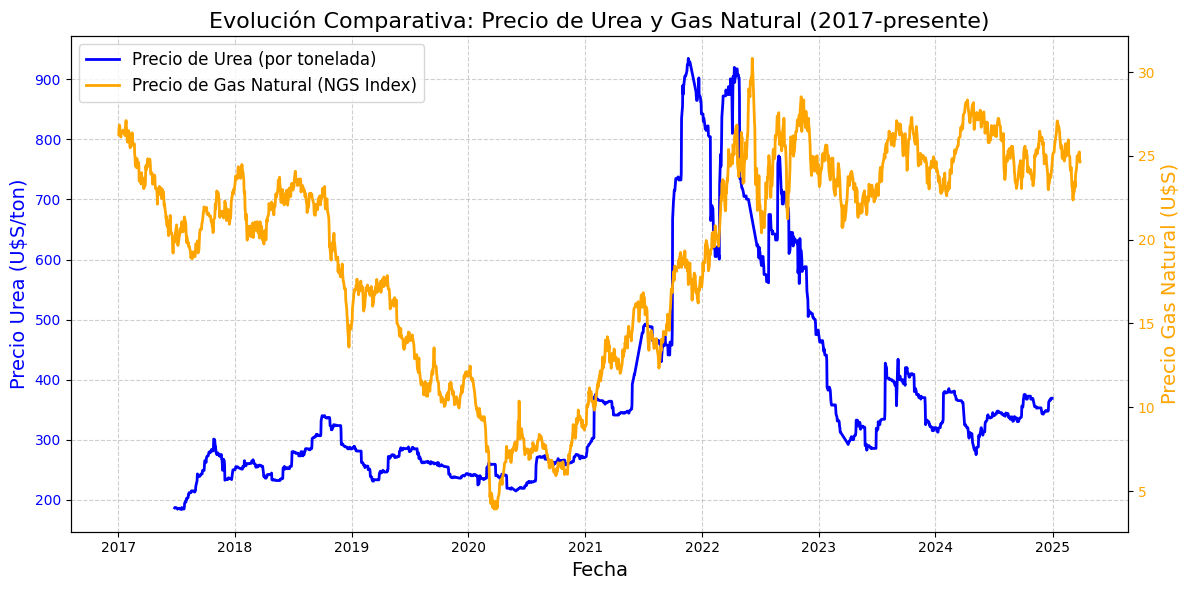

In [323]:
urea = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/precios_historicos/data_1_precio_urea_filtrada.csv')
gas_nat = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/precios_historicos/data_1_precio_nat_gas_filtrado.csv')

urea['FECHA'] = pd.to_datetime(urea['FECHA'])
gas_nat['FECHA'] = pd.to_datetime(gas_nat['FECHA'])

urea_filtered = urea[urea['FECHA'] >= '2017-01-01']
gas_nat_filtered = gas_nat[gas_nat['FECHA'] >= '2017-01-01']

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

line1 = ax1.plot(urea_filtered['FECHA'], urea_filtered['Price'], label='Precio de Urea (por tonelada)', color='blue', linewidth=2)

line2 = ax2.plot(gas_nat_filtered['FECHA'], gas_nat_filtered['Price'], label='Precio de Gas Natural (NGS Index)', color='orange', linewidth=2)

ax1.set_xlabel('Fecha', fontsize=14)
plt.xticks(rotation=45)

ax1.set_ylabel('Precio Urea (U$S/ton)', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2.set_ylabel('Precio Gas Natural (U$S)', fontsize=14, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Evolución Comparativa: Precio de Urea y Gas Natural (2017-presente)', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.6)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

Ahora visualizamos el cambio mensual en % en precio de la Urea, así podemos ver con una perspectiva más amplia como se ha comportado el activo y su volatilidad.

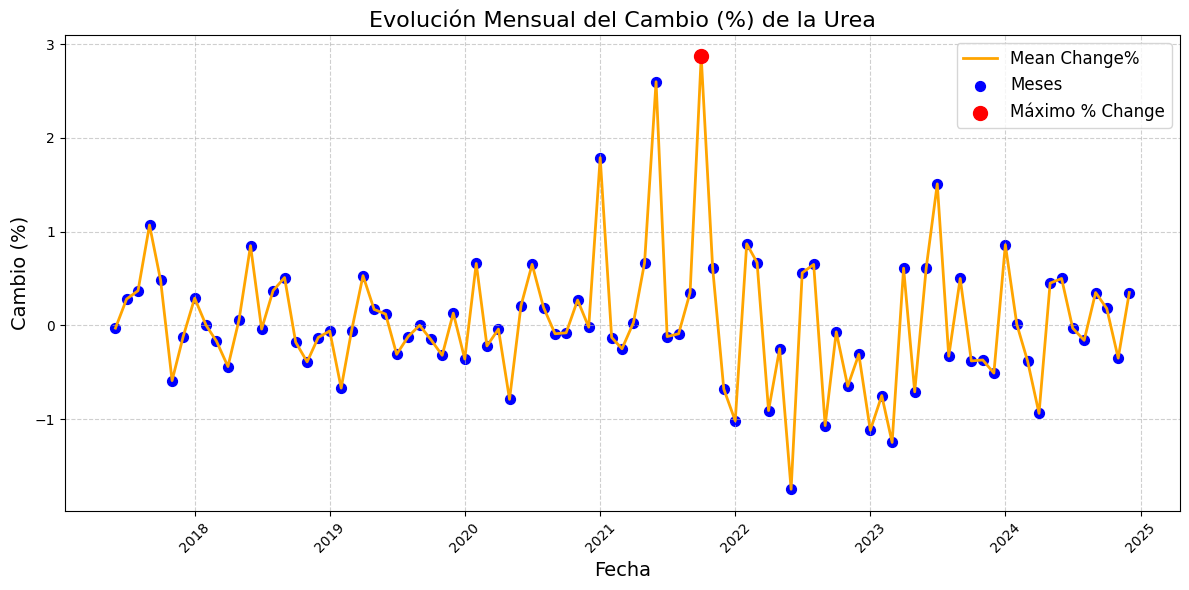

In [324]:
urea_mensual = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/precios_historicos/promedio_precio_por_mes_urea.csv')

urea_mensual['FECHA'] = pd.to_datetime(urea_mensual[['Year', 'Month']].assign(Day=1))

urea_mensual['Mean Change%'] = urea_mensual['Mean Change%'].str.replace('%', '').astype(float)

plt.figure(figsize=(12, 6))

plt.plot(urea_mensual['FECHA'], urea_mensual['Mean Change%'], label='Mean Change%', color='orange', linewidth=2)

plt.scatter(urea_mensual['FECHA'], urea_mensual['Mean Change%'], color='blue', s=50, label='Meses')

max_change = urea_mensual['Mean Change%'].max()
max_change_point = urea_mensual[urea_mensual['Mean Change%'] == max_change]
plt.scatter(max_change_point['FECHA'], max_change_point['Mean Change%'], color='red', s=100, label='Máximo % Change', zorder=5)

plt.title('Evolución Mensual del Cambio (%) de la Urea', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cambio (%)', fontsize=14)

plt.xticks(rotation=45)

# Agregar una cuadrícula
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

<h3>Hipótesis 1: Tomando de referencia el 24 de febrero de 2022</h3>

Podemos ver:

Si no tomamos en cuenta covid, 2022 fue unos de los anos tanto de mayor apreciación tanto para el gas Natural como para la Urea, que es un derivado del Gas Natural.

En el graficos de price changes de la Urea podemos ver un contraste entre antes de COVID y despues de covid, una subida en la volatilidad. Esto más que nada confirma que COVID trajo un cambio, pero podemos concluir que ese cambio se reforzó por la Guerra.

<h3>Situación país</h3>

Una vez tenemos claro la situación macro, me gustaría contextualizar el mercado agrícula ecuatoriano, pero no como un exportador (suplidor), sino como un importador (demandande) de fertilizantes.


Siendo que los datos en mercados agrícolas son difíciles de conseguir, por la informalidad de estos negocios, y más aún en un país latino como Ecuador, donde los pequeños agriculas representan gran parte del mercado, vamos a tomar como referencia las importaciones de fertilizantes al país.


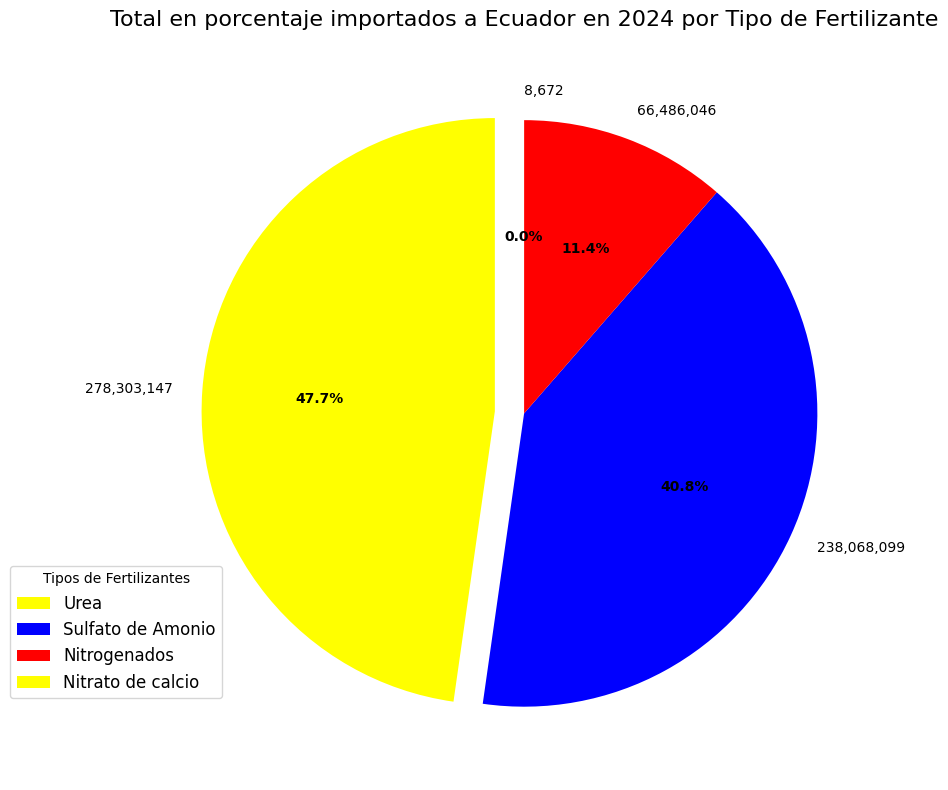

In [325]:
mercado_pais = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/resultado_mercado_fertilizantes_2024_porcentaje.csv')

mercado_pais.set_index("Tipo de Fertilizante", inplace=True)

valores = mercado_pais["Volumen Total en KGS"].values
labels = [f"{x:,.0f}" for x in valores]

colores = ['yellow', 'blue', 'red', 'yellow']

fig, ax = plt.subplots(figsize=(12, 8))

# Con ax.pie puedo eliminar la etiqueta
wedges, texts, autotexts = ax.pie(
    valores,
    labels=labels,
    autopct='%1.1f%%',
    explode=(0.1, 0, 0, 0),
    colors=colores,
    startangle=90
)

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Total en porcentaje importados a Ecuador en 2024 por Tipo de Fertilizante", 
             fontsize=16, 
             loc='center', 
             pad=15)  

ax.legend(
    wedges,
    mercado_pais.index,
    title="Tipos de Fertilizantes",
    loc="lower right",
    bbox_to_anchor=(0.1, 0.1),
    fontsize=12
)

plt.tight_layout()
plt.show()

Tener en cuenta que la urea es un producto listo para venderse, no como el Sulfato de Amonio, Nitrogenados y Nitrato de calcio, los cuales son productos que tienen subproductos y se distribuyen en mezclas. Podemos ver la clara dominancia de la urea.


Ahora vemos los costos y cantidades de importaciones año a año


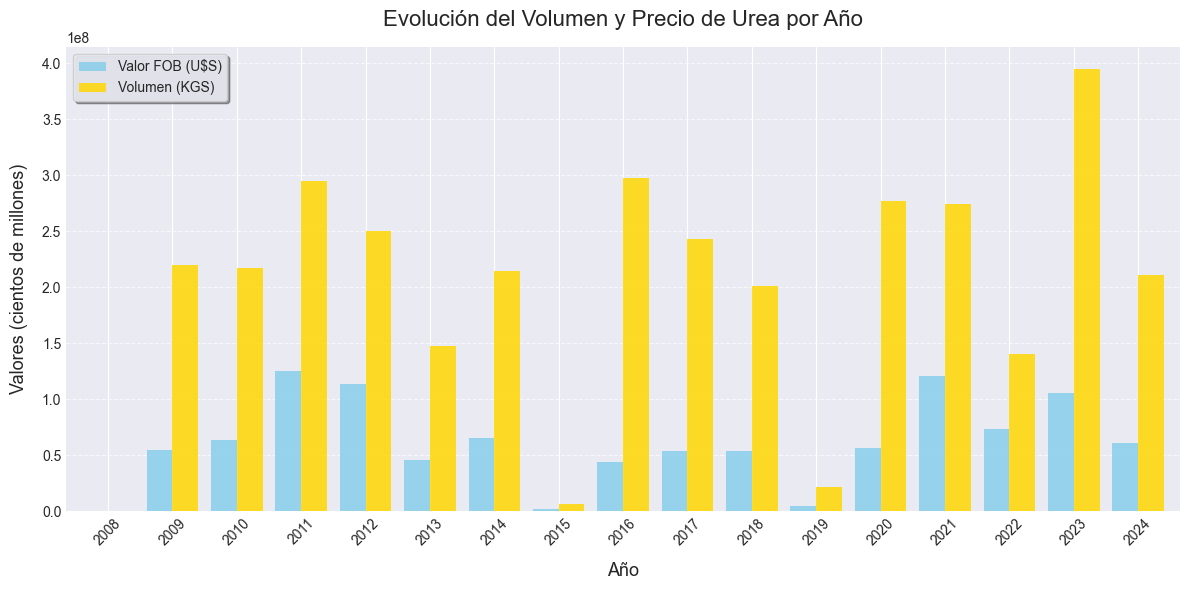

In [326]:
fob_kgs_anual = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/fob_kgs/fob_kgs_anual.csv')

style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(figsize=(12, 6))

colores = ['#87CEEB', '#FFD700'] 

fob_kgs_anual.plot(
    x='Year', 
    y=['FOB U$S Total', 'TOTAL KGS NETO'], 
    kind='bar', 
    color=colores,
    alpha=0.85,  
    width=0.8,   
    ax=ax
)

plt.xlabel('Año', fontsize=13, labelpad=10)
plt.ylabel('Valores (cientos de millones)', fontsize=13, labelpad=10)
plt.title('Evolución del Volumen y Precio de Urea por Año', fontsize=16, pad=15)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.legend(
    ['Valor FOB (U$S)', 'Volumen (KGS)'], 
    frameon=True, 
    fancybox=True, 
    shadow=True, 
    framealpha=0.9,
    loc='upper left'
)

plt.tight_layout()
plt.show()

<h3>Hipótesis 2: Tomando en cuenta los costos antes y despues de la guerra:</h3>

Lo que podemos ver claramente es la fuerte correlación mes a mes que tienen el precio y la cantidad la Urea en Ecuador y en general en el mundo siendo que las commodities se mueven por oferta y demanda.
Por otro lado ya viendo las barras año a año podemos ver que el año concecuente a la guerra, se disparo la compra, con el valor commprado cercanos a los mas altos desde 2009 y en cantidades las más altas desde 2009. 
Esto nos hace plantear la teoría de que este mercado estacional reacciona tardiamente a sucesos.

<h3>¿Principal partner? ¿De donde vienen las importaciones?</h3>


AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_la'

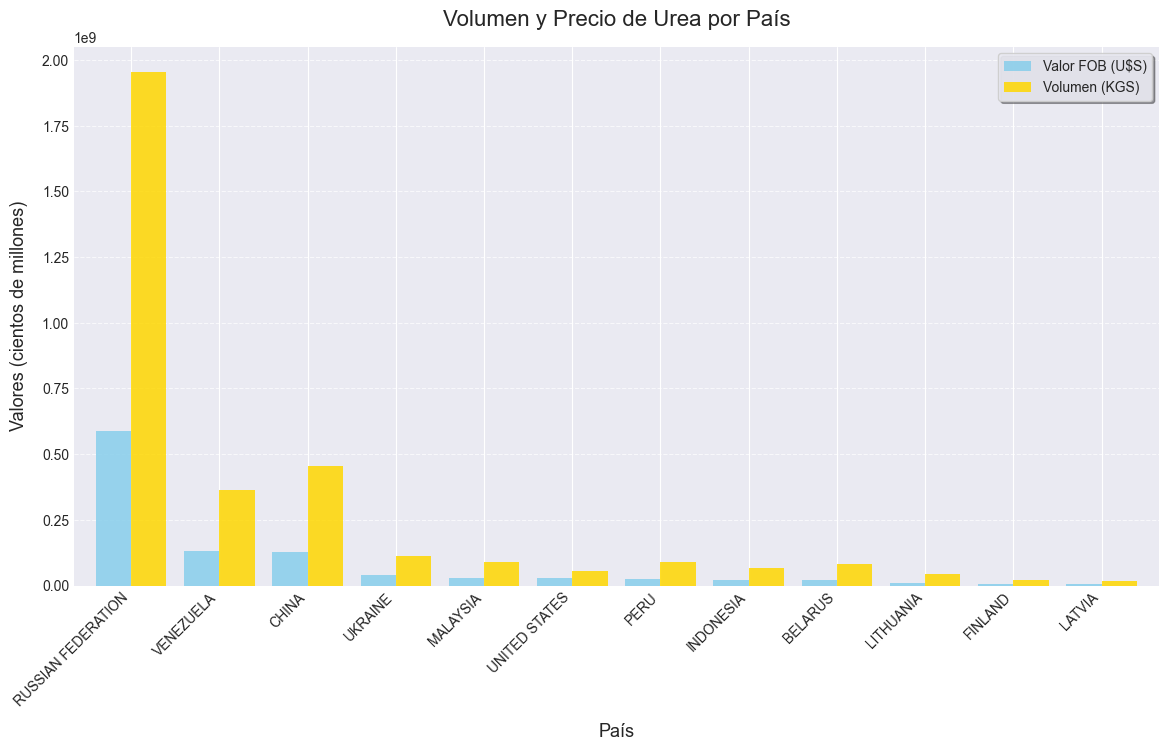

In [327]:
resumen_por_pais = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/resumen_por_pais.csv')

style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(figsize=(14, 7))

data_subset = resumen_por_pais.head(12)

colores = ['#87CEEB', '#FFD700']  

data_subset.plot(
    x='País', 
    y=['FOB Total', 'KGS NETO Total'], 
    kind='bar', 
    color=colores,
    alpha=0.85,  
    width=0.8,  
    ax=ax
)

plt.xlabel('País', fontsize=13, labelpad=10)
plt.ylabel('Valores (cientos de millones)', fontsize=13, labelpad=10)
plt.title('Volumen y Precio de Urea por País', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.legend(
    ['Valor FOB (U$S)', 'Volumen (KGS)'], 
    frameon=True, 
    fancybox=True, 
    shadow=True, 
    framealpha=0.9,
    loc='upper right'  
)

plt.tight_la

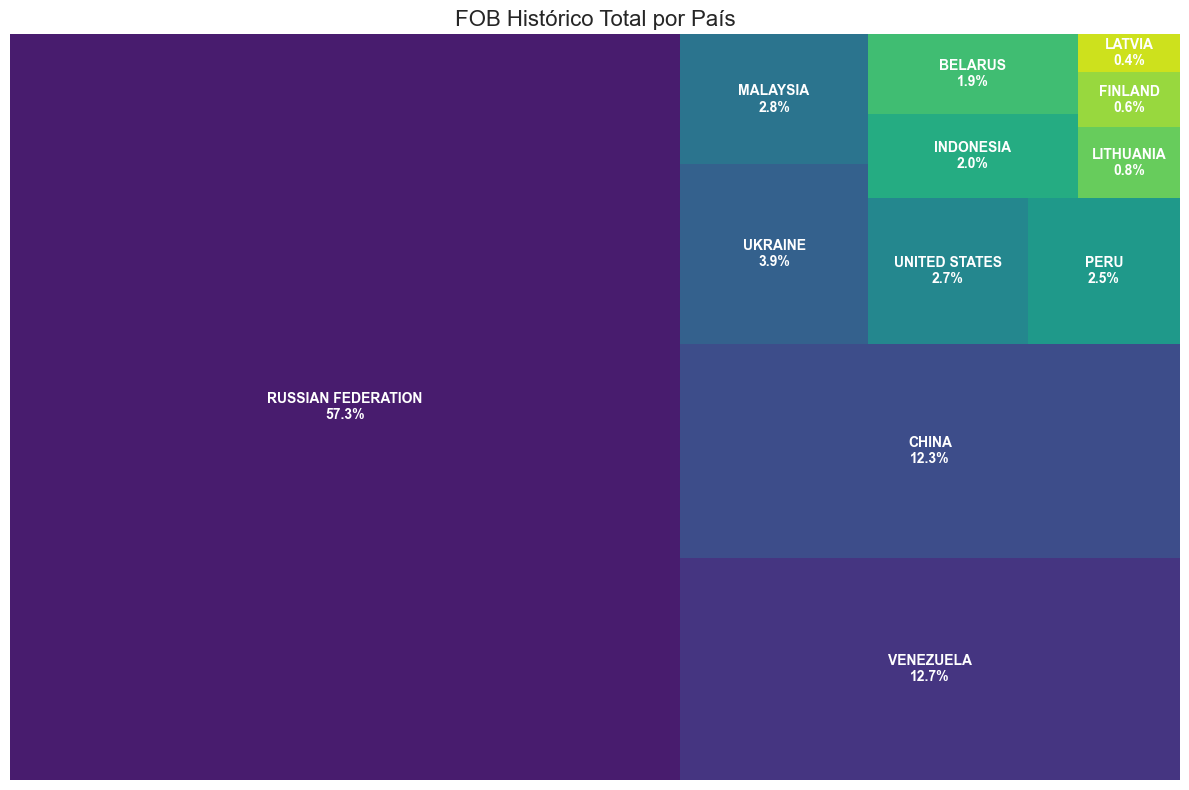

In [328]:
resumen_por_pais = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/resumen_por_pais.csv')

data = resumen_por_pais.head(12).sort_values('FOB Total', ascending=False)
data['Porcentaje'] = (data['FOB Total'] / data['FOB Total'].sum()) * 100
data['Etiqueta'] = data.apply(lambda x: f"{x['País']}\n{round(x['Porcentaje'], 1)}%", axis=1)

plt.figure(figsize=(12, 8))

colores = sns.color_palette("viridis", len(data))
squarify.plot(
    sizes=data['FOB Total'],
    label=data['Etiqueta'],
    color=colores,
    pad=0, 
    text_kwargs={'color': 'white', 'fontweight': 'bold'}
)

plt.title('FOB Histórico Total por País', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

<h3>Hipótesis 3: Rusia como principal partner</h3>

Siendo que la data mostrada es desde 2009, se puede estar seguro que con la guerra y el como esto exprimió la oferta de Urea en el mercado, Rusia consiguió asentarse como socio principal de urea en el Ecuador.

<h3>El clima y la agricultura en Ecuador</h3>

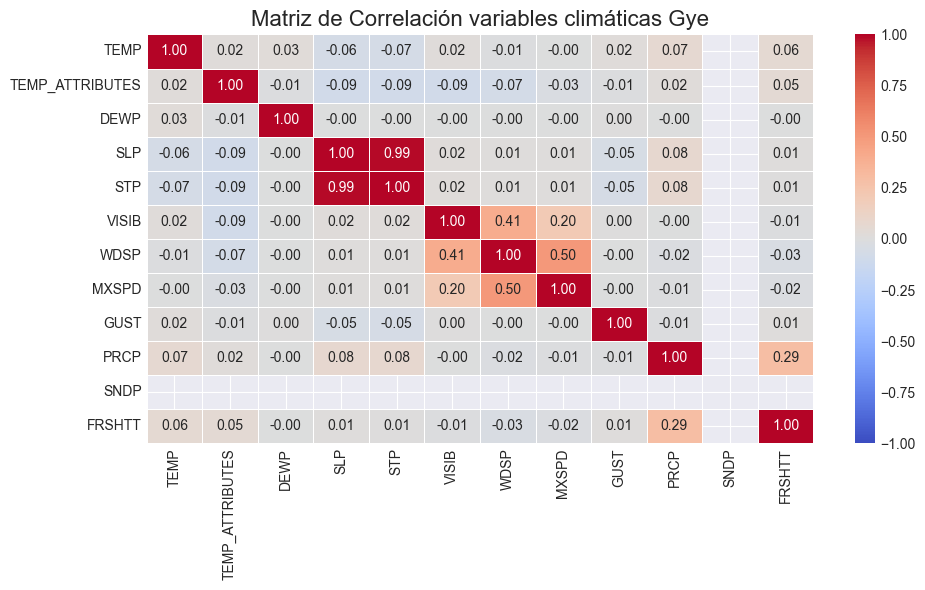

In [329]:
data_total_clima_para_matriz = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/data_total_clima_para_matriz')

correlation_matrix = data_total_clima_para_matriz.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm',  
    fmt='.2f',  
    linewidths=0.5,  
    cbar=True,  
    vmin=-1, vmax=1  
)

plt.title('Matriz de Correlación variables climáticas Gye', fontsize=16)
plt.tight_layout()
plt.show()

<h4>Correlaciones encontradas: </h4>

STP(Station Pressure)-SLP(Sea Level Pressure), correlacion de 0.99: La primera es la presión atmosférica medida en la estación meteorológica, la segunda es la presión atmosférica ajustada al nivel del mar. Son dos presiones atmosfericas que se mueven juntas.

WDSP (Wind Speed)-VISIB (Visibility), correlacion de 0.41: La primera representa la velocidad del viento, la segunda la visibilidad horizontal. Hace sentido su correlacion.

MXSPD (Maximum Wind Speed)-WDSP (Wind Speed): Correlacion obvia.


Ahora que la matriz de correlacion no nos ha dado ningun insight, pasamos a graficar la precipitacion promedio de guayaquil en los 12 meses a lo largo del tiempo. Hemos obtenido este dato de limpiar la precipitacion desde 2009 de Guayquil.


<h3>Hipótesis 4: Correlaciones en el clima de Guayaquil</h3>

Esta hipotesis queda inconclusa, ya que ninguna correlacion resalta entre las variables climaticas.

<h3>La precipitación y los volumenes de importación tienen alguna relación entre si</h3>


Para esto vamos a visualizer la precipitación promedio en guayaquil de enero y diciembre, super puesto con el valor de las importaciones promedio de urea al Ecuador.

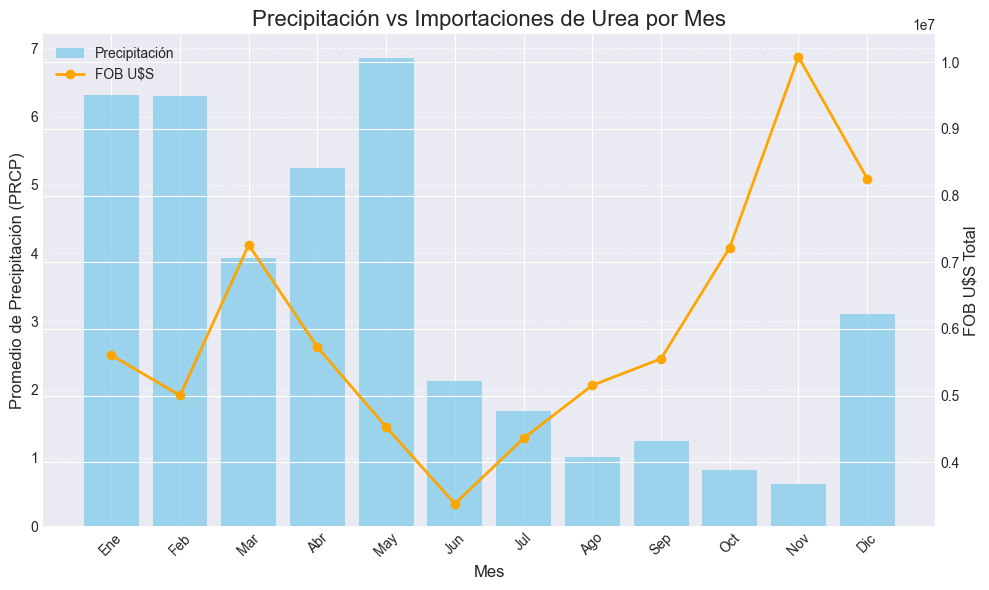

In [331]:
promedio_prcp_por_mes = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/promedio_prcp_por_mes.csv')
merge_clima_kg_fob = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/merge_clima_kg_fob.csv')

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(promedio_prcp_por_mes['Month'], promedio_prcp_por_mes['Promedio PRCP'], color='skyblue', alpha=0.8, label='Precipitación')

ax2.plot(merge_clima_kg_fob['Month'], merge_clima_kg_fob['FOB U$S Total'], color='orange', marker='o', linewidth=2, label='FOB U$S')

ax1.set_xlabel('Mes', fontsize=12)
ax1.set_ylabel('Promedio de Precipitación (PRCP)', fontsize=12)
ax2.set_ylabel('FOB U$S Total', fontsize=12)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Precipitación vs Importaciones de Urea por Mes', fontsize=16)
plt.tight_layout()
plt.show()

Para terminar de ver el claro de patrón que refuerza la teroía de que los importadores ecuatorianos compran en preparación o en reacción a la época de lluvia, podemos ver en un scatterplot los días en los últimos años en los que ha habido una precipitación mayor al mean (de 2,9).

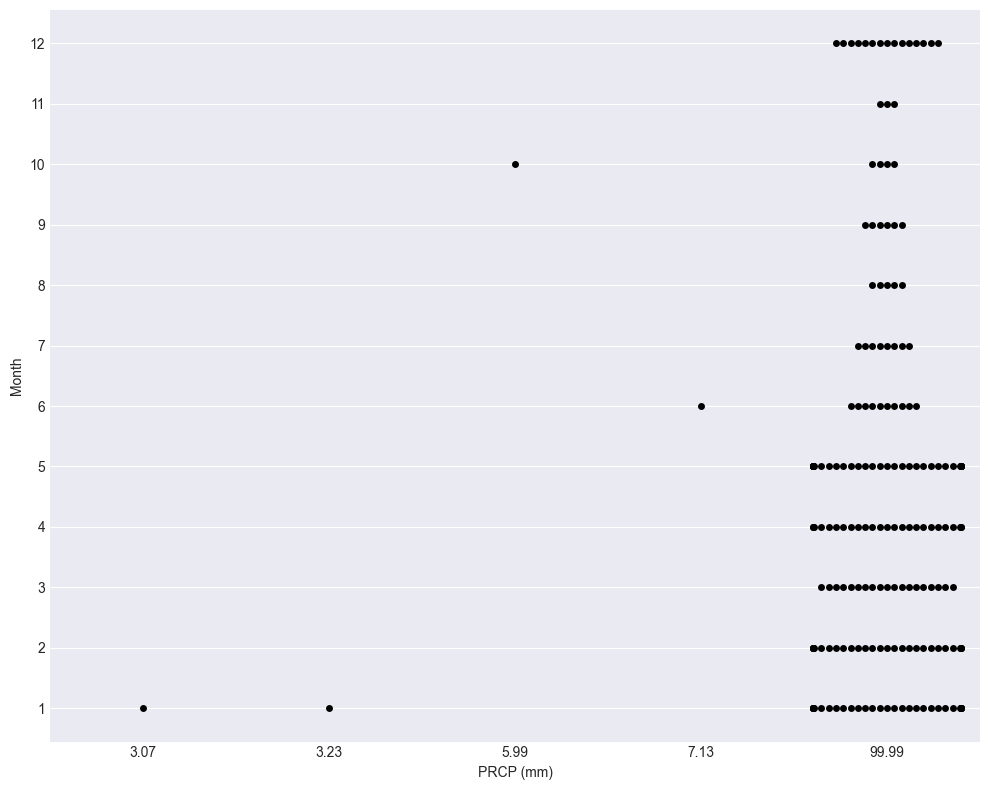

In [332]:
resumen_dias_lluvia_desagrupado = pd.read_csv('/Users/auric/REPO_TEST/Entregas/Entrega 28 - 03 de abril de marzo/EDA Agricultura_Clima Ecuador/EDA/Data_2/clima_si/resumen_dias_lluvia_desagrupado.csv') 

df_gfw = resumen_dias_lluvia_desagrupado[resumen_dias_lluvia_desagrupado['PRCP'].isin([3.07, 3.23, 99.99, 7.13, 5.99])]

plt.figure(figsize=(10, 8))

sns.swarmplot(x="PRCP", y="Month", data=df_gfw, color='black')

plt.xlabel('PRCP (mm)')

plt.yticks(range(1, 13))

plt.tight_layout()
plt.show()

<h3>Hipótesis 5: La precipitacion y el volumen de compras</h3>

Podemos ver que los volumenes de compras tocan sus puntos mas altos el mes antes a los de mayor precipitacion o en reacción a bastas lluvias.

<h1>FINAL</H1>